## Start


In [3]:
# transform data into sqlite database
from data_loader import TableLoader

table_loader = TableLoader(table_name='wikitable', split='test', use_sample=False, small_test=False)



In [4]:
len(table_loader.dataset)

4344

In [1]:
from datasets import load_dataset
totto = load_dataset('./data_loader/totto_zh.py', verification_mode="no_checks", cache_dir="/media/disk2/datasets")
tabfact = load_dataset('./data_loader/tabfact.py', verification_mode="no_checks", cache_dir="/media/disk2/datasets")
sqa = load_dataset('./data_loader/sqa.py', verification_mode="no_checks", cache_dir="/media/disk2/datasets")

In [34]:
filtered_dataset = table_loader.dataset.filter(lambda example: example['small_test'])

Filter: 100%|██████████| 1000/1000 [00:00<00:00, 4669.79 examples/s]


In [35]:
filtered_dataset

Dataset({
    features: ['id', 'table', 'statement', 'label', 'hardness', 'small_test'],
    num_rows: 147
})

In [13]:
len(table_loader.dataset)


47

In [35]:
test_sample = table_loader.dataset[2]
test_sample

{'id': 996,
 'table': {'id': '2-16369528-1.html.csv',
  'header': ['year',
   'best teenage / young adult',
   "reader 's vote",
   'best non - fiction',
   'lifetime achievement'],
  'rows': [['1996', 'na', 'na', 'na', 'jon cleary'],
   ['1997',
    'na',
    'na',
    'how to write crime edited by marele day',
    'alan yates (aka carter brown )'],
   ['1998', 'na', 'na', 'na', 'na'],
   ['1999', 'na', 'na', 'na', 'peter corris'],
   ['2000', 'na', 'na', 'na', 'na'],
   ['2001',
    'na',
    'bleeding hearts by lindy cameron',
    'na',
    'professor stephen knight'],
   ['2002',
    'blue murder by ken catran',
    'apartment 255 by bunty avieson',
    'na',
    'patrick gallagher'],
   ['2003', 'na', 'na', 'na', 'kerry greenwood'],
   ['2004', 'na', 'na', 'na', 'bob bottom'],
   ['2005', 'na', 'na', 'na', 'stuart coupe'],
   ['2006', 'na', 'na', 'na', 'andrew rule and john silvester'],
   ['2007', 'na', 'na', 'na', 'sandra harvey and lindsay simpson'],
   ['2008', 'na', 'na', 'na

### Data Augmentation

In [ ]:
#引入 schema(table measurement) statistical(numerical) enum string(char) date
#引入 term explanation（table comment(RAG)）
#引入 column summarization
#是否需要search engine
#table size, statistical features, header hierarchy


In [3]:
#schema 
from data_loader import TableFormat
from langchain.prompts.prompt import PromptTemplate
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI, OpenAI
model = ChatOpenAI(model_name="gpt-3.5-turbo-0125", openai_api_base="https://api.chatanywhere.tech/v1", openai_api_key="sk-kxgtm71G6zwC44lglIF5CfiEVVzjjc39TOtppkNAwrVA2fUW")
# formatter = TableFormat(format='none', data=test_sample, use_sampling=True)
pre_instruction = PromptTemplate(input_variables=["table"], template=
"""
Instruction: Given the following table, you will add Metadata about the columns in the table.
Metadata includes:
- Numerical: whether the column content is numeric type like int or float.
- Char: whether the column content is a text or description.
- Date: whether the column content is datetime.

You need to output all the column names with metadata in angle brackets.
Example: name<Char>, launched<Date>, count<Numerical>

Table: {table}
Output:
""")
# 
# output = model.invoke([HumanMessage(content=pre_instruction.format(table=formatter.format_html()))])

In [16]:
output.response_metadata['token_usage']

{'completion_tokens': 1, 'prompt_tokens': 269, 'total_tokens': 270}

In [51]:
#summarization
pre_instruction_summary = PromptTemplate(input_variables=['table'], template=
"""
Instruction: Given the following table, you need to first summarize the contents of the table, then based on the summay, give a concluded description to each of the column.
Table: {table}

The output should use the following format: 
table summary: #summary for table contents
column description: You need to output all the column names with description in angle brackets
example: launched<The launched date for the competition> date<The date of the match>
""")
output = model.invoke([HumanMessage(content=pre_instruction_summary.format(table=formatter.format_html()))])

In [52]:
print(output.content)

table summary: The table shows the performance of a player in different tennis tournaments from 1986 to 1999.

column description: 
tournament<The name of the tennis tournament>
1986<The player's performance in the tournament in 1986>
1988<The player's performance in the tournament in 1988>
1989<The player's performance in the tournament in 1989>
1990<The player's performance in the tournament in 1990>
1991<The player's performance in the tournament in 1991>
1992<The player's performance in the tournament in 1992>
1993<The player's performance in the tournament in 1993>
1994<The player's performance in the tournament in 1994>
1995<The player's performance in the tournament in 1995>
1996<The player's performance in the tournament in 1996>
1997<The player's performance in the tournament in 1997>
1998<The player's performance in the tournament in 1998>
1999<The player's performance in the tournament in 1999>


In [11]:
import os
os.environ['LANGCHAIN_TRACING_V2'] = "true"

In [10]:
#table_size
def get_table_size():
    return f'The table has {formatter.data.shape[0]} rows and {formatter.data.shape[1]} columns.'
from langchain_openai import ChatOpenAI
model = ChatOpenAI(model_name="gpt-3.5-turbo-0125", openai_api_base="https://api.chatanywhere.cn/v1", openai_api_key="sk-kxgtm71G6zwC44lglIF5CfiEVVzjjc39TOtppkNAwrVA2fUW", temperature=0.1)
from data_loader import TableAug,TableFormat
aug = TableAug(model)
# aug.schema_aug(test_sample)
test_sample = table_loader.dataset[0]
formatter = TableFormat(format='none')
output = aug.batch_summary_aug(formatter, table_loader.dataset[:2], batch_size=2, output_token=True)
# batch_data = table_loader.dataset[:2]

# print([formatter.load_data_from_dic({key: value[i] for key, value in batch_data.items()}).format_html() for i in range(len(batch_data.keys())) ])
# print([formatter.load_data_from_dic({key: value[i] for key, value in table_loader.dataset[:2].items()}).format_html() for i in range(2)])

KeyError: 0

In [9]:
print(output[0])

{'text': 'table summary: The table provides information about different wind farms including their names, scheduled dates, capacity in megawatts, number of turbines, types of turbines, and locations.\n\ncolumn description: \nwind farm<The name of the wind farm>\nscheduled<The scheduled date for the wind farm>\ncapacity (mw)<The capacity of the wind farm in megawatts>\nturbines<The number of turbines at the wind farm>\ntype<The type of turbines used at the wind farm>\nlocation<The location of the wind farm>'}


In [8]:
print(formatter.format_nl_sep())

Col :Name|Title|Date_c_from|Date_until|Russian_state|Austrian_state
Row 1 :Lev Pavlovich Urusov|Ambassador|1905|1910|Russian Empire|Austria-Hungary
Row 2 :Konstantin Konstantinovich Yurenev|Plenipotentiary|1 October 1927|24 January 1933|Soviet Union|Federal State of Austria
Row 3 :Averky Borisovich Aristov|Ambassador Extraordinary and Plenipotentiary|20 September 1971|11 July 1973|Soviet Union|Republic of Austria


## Embedding

In [84]:
sample['table']['id']

'csv/204-csv/925.tsv'

In [131]:
import pandas as pd
from utils import parse_specific_composition, parse_output
sample = table_loader.normalize_table(table_loader.dataset[505])
formatter = TableFormat(format='none',data=sample)
formatter.all_data
row_string = []
task_name = 'wikitable'
split = 'test'
schema_information = pd.read_csv(f"result/aug/{task_name}_{split}_schema.csv", index_col='table_id')
aug_information = pd.read_csv(f"result/aug/{task_name}_{split}_summary.csv", index_col='table_id')
composition_information = pd.read_csv(f"result/aug/{task_name}_{split}_composition.csv", index_col='table_id')
summary_aug, column_aug = aug_information.loc[sample['table']['id']]['summary'], aug_information.loc[sample['table']['id']]['column_description']
col_names, col_infos = parse_output(column_aug, pattern=r'([^<]*)<([^>]*)>')
extra_col_info = []
for i_c in range(len(col_names)):
    extra_col_info.append(f'{col_names[i_c]}: {col_infos[i_c]}')
# extra_information = '\n'.join(parse_specific_composition(composition_information.loc[sample['table']['id']]['composition'], formatter.all_data.columns))
# for i in range(len(formatter.all_data.columns)):
#     row_string.append(formatter.all_data.columns[i])
# from langchain_text_splitters import CharacterTextSplitter
# text_splitter = CharacterTextSplitter(chunk_size=1, chunk_overlap=0, separator='\n\n')
# texts = text_splitter.split_text('\n\n'.join(row_string))

In [15]:
from langchain_openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(openai_api_base="https://api.chatanywhere.com.cn/v1", openai_api_key="sk-WZtqZEeuE0Xb6syVghDgAxdwe0ASWLkQRGxl61UI7B9RqNC4")

In [91]:
sample['query']

'which team had the first pick this round?'

In [132]:
from langchain_community.vectorstores import FAISS
db = FAISS.from_texts(extra_col_info, embeddings)

In [185]:
retriever = db.as_retriever(search_kwargs={"include_metadata": True, "score_threshold": 0.4})
result = retriever.invoke(sample['query'])

In [140]:
[r.page_content.split(':')[0].strip() for r in result]  + ['a']

['NHL_team', 'Pick_num', 'a']

In [139]:
formatter.all_data[[r.page_content.split(':')[0].strip() for r in result]]

,NHL_team,Pick_num
0,Winnipeg Jets,148
1,Detroit Red Wings,149
2,Colorado Rockies,150
3,Hartford Whalers,151
4,Washington Capitals,152
5,Toronto Maple Leafs,153
6,Pittsburgh Penguins,154
7,Edmonton Oilers,155
8,New York Rangers,156
9,Vancouver Canucks,157


In [100]:
import re
pattern = re.compile(r'# Row (\d+)')
rowinds = [int(pattern.search(r.page_content).group(1)) for r in result]

AttributeError: 'NoneType' object has no attribute 'group'

In [41]:
formatter.all_data.loc[rowinds]

,Name,League,FA_Cup,League_Cup,JP_Trophy,Total
8,Jamie Cureton,20,0,0,0,20
5,Guillem Bauza,2,0,0,0,2
7,Pat Baldwin,1,0,0,0,1
11,OWN GOALS,0,0,0,0,0


### Few Shot learning

In [9]:
from langchain.prompts.prompt import PromptTemplate
from langchain.prompts.few_shot import FewShotPromptTemplate
from data_loader import TableFormat
summary_examples = ['The columns in the table are "wind farm, scheduled, capacity (mw), turbines, type, and location." The rows in the table represent different wind farms, with information about their scheduled dates, capacity, number of turbines, type, and location.',
                    "The table provides information about different destroyers, including their kanji (Japanese characters), names, builders, dates when they were laid down, launched, and completed."]
subtable_examples = ['Columns(wind farm, scheduled, turbines), Rows(12)',
                    'Columns(kanji, builder), Rows(ALL)']
inds = [0, 100]
examples_prompt = PromptTemplate(input_variables=["table", "claim", "summary", "subtable"], template=
"""
Table: {table}
Claim: {claim}
Summary: {summary}
Subtable: {subtable}""")
formatter = TableFormat(format='none', data=test_sample, use_sampling=True)
num_k = 2
# examples = [examples_prompt.format(**{"table": TableFormat(format='none', data=table_loader.dataset[inds[i]]).format_html(),
#                                     "claim": table_loader.dataset[inds[i]]['statement'],
#                                     "summary": summary_examples[i],
#                                     "subtable": subtable_examples[i]}) for i in range(num_k)]

examples_dict = [{"table": TableFormat(format='none', data=table_loader.dataset[inds[i]], use_sampling=True).format_html(),
                                    "claim": table_loader.dataset[inds[i]]['statement'],
                                    "summary": summary_examples[i],
                                    "subtable": subtable_examples[i]} for i in range(num_k)]
prompt = FewShotPromptTemplate(
    examples=examples_dict,
    example_prompt=examples_prompt,
    prefix="Instruction: Given the following table and claim, let's first summarize the contents of the rows and columns of the table, and then select relevent rows/columns in the given table that support or oppose the statement.",
    suffix=
    """
Table: {table}
Claim: {claim}
    """,
    input_variables=["table", "claim"],
)
print(prompt.format(table=formatter.format_html(), claim=test_sample['statement']))

Instruction: Given the following table and claim, let's first summarize the contents of the rows and columns of the table, and then select relevent rows/columns in the given table that support or oppose the statement.


Table: <table>
<thead>
<tr><th>  wind farm</th><th>  scheduled</th><th>  capacity (mw)</th><th>  turbines</th><th>              type</th><th>      location</th></tr>
</thead>
<tbody>
<tr><td>codling    </td><td>unknown    </td><td>1100           </td><td>220       </td><td>unknown           </td><td>county wicklow</td></tr>
<tr><td>carrowleagh</td><td>2012       </td><td>36.8           </td><td>16        </td><td>enercon e - 70 2.3</td><td>county cork   </td></tr>
<tr><td>gortahile  </td><td>2010 autumn</td><td>20             </td><td>8         </td><td>nordex n90        </td><td>county laois  </td></tr>
</tbody>
</table>
Claim: the scheduled date for the farm with 17 turbine be 2012
Summary: The columns in the table are "wind farm, scheduled, capacity (mw), turbines, t

In [5]:
from data_loader import TableFormat
from langchain_openai import ChatOpenAI, OpenAI
from langchain_core.messages import HumanMessage
from langchain.prompts.prompt import PromptTemplate
model = ChatOpenAI(model_name="gpt-3.5-turbo", openai_api_base="https://api.chatanywhere.cn/v1", openai_api_key="sk-kxgtm71G6zwC44lglIF5CfiEVVzjjc39TOtppkNAwrVA2fUW")
model.invoke([HumanMessage(content=prompt.format(table=formatter.format_html(), claim=test_sample['statement']))])

AIMessage(content='Summary: The table provides information about different events, including their names, establishment years, categories, subcategories, and main venues.\nSubtable: Columns(event name, established, category), Rows(2)', response_metadata={'token_usage': {'completion_tokens': 41, 'prompt_tokens': 931, 'total_tokens': 972}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None})

### Few-shot for operations

In [38]:
from data_loader import TableFormat
from langchain_openai import ChatOpenAI, OpenAI
from langchain_core.messages import HumanMessage
from langchain.prompts.few_shot import FewShotPromptTemplate
from langchain.prompts.prompt import PromptTemplate
model = ChatOpenAI(model_name="gpt-3.5-turbo-0125", openai_api_base="https://api.chatanywhere.cn/v1", openai_api_key="sk-kxgtm71G6zwC44lglIF5CfiEVVzjjc39TOtppkNAwrVA2fUW")
formatter = TableFormat(format='none', data=test_sample, use_sampling=True)
inds = [0,2]
summary_examples = ['The columns in the table are "wind farm, scheduled, capacity (mw), turbines, type, and location." The rows in the table represent different wind farms, with information about their scheduled dates, capacity, number of turbines, type, and location.',
                    "The table provides information about different events, including their names, establishment years, categories, subcategories, and main venues."]
Output_examples = ['wind farm<DELETE>, scheduled<KEEP>, capacity (mw)<DELETE>, turbines<KEEP>, type<KEEP>, location<KEEP>', 'event name<KEEP> established<KEEP> category<KEEP> sub category<DELETE> main venue<DELETE>']
examples_prompt = PromptTemplate(input_variables=["table", "claim", "output"], template=
"""
Table: {table}
Claim: {claim}
Output: {output}""")
num_k = 2
examples_dict = [{"table": TableFormat(format='none', data=table_loader.dataset[inds[i]], use_sampling=True).format_html(),
                                    "claim": table_loader.dataset[inds[i]]['statement'],
                                    # "summary": summary_examples[i],
                                    "output": Output_examples[i]} for i in range(num_k)]
prompt = FewShotPromptTemplate(
    examples=examples_dict,
    example_prompt=examples_prompt,
    prefix="""You are a brilliant table executor with the capabilities information retrieval, table parsing, table partition and semantic understanding who can understand the structural information of the table.
Instruction: Given the following table and claim, you will output the operations corresponding to each column which can help us judging the truth or falsity of claim.
Operations: DELETE(delete column unrelevant to the claim), KEEP(keep column relevant to the claim), GROUP BY(combine aggregate functions and group the result set by one or more columns), COUNT(returns the number of rows in column), AVG(returns the average value of a numeric column), SUM(returns the sum of a numeric column), MAX(returns the max value of a numeric column), MIN(returns the min value of a numeric column), ORDER BY(sort the value in ascending order)""",
    suffix=
    """
Table: {table}
Thought: your reason here
Claim: {claim}
    """,
    input_variables=["table", "claim"],
)
print(prompt.format(table=formatter.format_html(), claim=test_sample['statement']))

# output = model.invoke([HumanMessage(content=prompt.format(table=formatter.format_html(), claim=test_sample['statement']))])



You are a brilliant table executor with the capabilities information retrieval, table parsing, table partition and semantic understanding who can understand the structural information of the table.
Instruction: Given the following table and claim, you will output the operations corresponding to each column which can help us judging the truth or falsity of claim.
Operations: DELETE(delete column unrelevant to the claim), KEEP(keep column relevant to the claim), GROUP BY(combine aggregate functions and group the result set by one or more columns), COUNT(returns the number of rows in column), AVG(returns the average value of a numeric column), SUM(returns the sum of a numeric column), MAX(returns the max value of a numeric column), MIN(returns the min value of a numeric column), ORDER BY(sort the value in ascending order)


Table: <table>
<thead>
<tr><th>  wind farm</th><th>  scheduled</th><th>  capacity (mw)</th><th>  turbines</th><th>              type</th><th>      location</th></tr>
<

In [39]:
output = model.invoke([HumanMessage(content=prompt.format(table=formatter.format_html(), claim=test_sample['statement']))])
print(output)

content='Output: date<DELETE>, tournament<DELETE>, surface<DELETE>, partner<KEEP>, opponents<KEEP>, score<DELETE>' response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 1037, 'total_tokens': 1063}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': 'fp_b28b39ffa8', 'finish_reason': 'stop', 'logprobs': None}


In [35]:
print(formatter.format_psql())
print(test_sample['statement'])
print(test_sample['label'])

+------------------+-----------------------------------+-----------+---------------------+------------------------------------------------+-----------------------+
| date             | tournament                        | surface   | partner             | opponents                                      | score                 |
|------------------+-----------------------------------+-----------+---------------------+------------------------------------------------+-----------------------|
| 15 january 2007  | algiers 2 , algeria               | clay      | rushmi chakravarthi | barbora matusova anna savitskaya               | 6 - 2 , 6 - 0         |
| 11 february 2008 | mallorca 2 , spain                | clay      | stephanie vogt      | leticia costas - moreira maite gabarrus alonso | 7 - 6 (7 - 2) , 6 - 3 |
| 28 april 2008    | makarska , croatia                | clay      | stephanie vogt      | tadeja majerić maša zec peškirič               | 7 - 5 , 6 - 2         |
| 8 september 20

## Zero-shot learning


In [22]:
from tabulate import tabulate
formatter = TableFormat(format='none', data=test_sample)
print(test_sample['statement'])
print(tabulate(formatter.data, headers=formatter.data.columns, tablefmt='psql'))
# print('Summary: The table provides information about different events, including their names, establishment years, categories, subcategories, and main venues.\nSubtable: Columns(event name, established, category), Rows(2)')

uraga dock company produce the most destroyer on the list , at 3
+----+---------+-------------------+--------------------------------+------------------+------------------+-------------------+
|    | kanji   | name              | builder                        | laid down        | launched         | completed         |
|----+---------+-------------------+--------------------------------+------------------+------------------+-------------------|
|  0 | 睦月    | mutsuki dd - 19   | sasebo naval arsenal , japan   | 21 may 1924      | 23 july 1925     | 25 march 1926     |
|  1 | 如月    | kisaragi dd - 21  | maizuru naval arsenal , japan  | 3 june 1924      | 5 june 1925      | 21 december 1925  |
|  2 | 彌生    | yayoi dd - 23     | uraga dock company , japan     | 11 january 1924  | 11 july 1925     | 28 august 1926    |
|  3 | 卯月    | uzuki dd - 25     | ishikawajima shipyards , japan | 11 january 1924  | 15 october 1925  | 14 september 1926 |
|  4 | 皐月    | satsuki dd - 27   | fujinagata s

In [10]:
from data_loader import TableFormat, TableLoader
from langchain_openai import ChatOpenAI, OpenAI
from langchain_core.messages import HumanMessage
from langchain.prompts.prompt import PromptTemplate
model = ChatOpenAI(model_name="gpt-3.5-turbo", openai_api_base="https://api.chatanywhere.cn/v1", openai_api_key="sk-kxgtm71G6zwC44lglIF5CfiEVVzjjc39TOtppkNAwrVA2fUW")
table_loader = TableLoader(table_name='wikitable', split='test', use_sample=True, small_test=False)
test_sample = table_loader.dataset[40]
formatter = TableFormat(format='none', data=test_sample, use_sampling=True)
pre_instruction_schema = PromptTemplate(input_variables=["table"], template="""
Instruction: Given the following table, you need to summarize the contents of the table and tell what table is about.
Table: {table}

The output should use the following format: 
Summary: #summary for table contents

Summary:
""")
output = model.invoke([HumanMessage(content=pre_instruction_schema.format(table=formatter.format_html(),))])



In [11]:
print(output.content)

The table provides information about different games played by a football team. It includes details like the week number, date of the game, opponent team, game result, game site, NFL recap, and the attendance for each game.


In [40]:
from tabulate import tabulate
print(tabulate(formatter.data, headers=formatter.data.columns, tablefmt='psql'))
print('Summary: The table provides information about different events, including their names, establishment years, categories, subcategories, and main venues.\nSubtable: Columns(event name, established, category), Rows(touchdown atlantic)')

+----+--------------------------------------------+---------------+----------------+----------------+--------------------------+
|    | event name                                 |   established | category       | sub category   | main venue               |
|----+--------------------------------------------+---------------+----------------+----------------+--------------------------|
|  0 | dieppe kite international                  |          2001 | sporting       | kite flying    | dover park               |
|  1 | the frye festival                          |          2000 | arts           | literary       | university of moncton    |
|  2 | hubcap comedy festival                     |          2000 | arts           | comedy         | various                  |
|  3 | touchdown atlantic                         |          2010 | sporting       | football       | moncton stadium          |
|  4 | atlantic nationals automotive extravaganza |          2000 | transportation | automotive  

In [41]:
print(test_sample['statement'])

touchdown atlantic , in the category of sporting , be establish in 2010


In [38]:
import os
from tenacity import retry, stop_after_attempt, wait_random_exponential
from typing import List
from openai import OpenAI
class Config:
    def __init__(self) -> None:
        self.openai_api_key = "sk-kxgtm71G6zwC44lglIF5CfiEVVzjjc39TOtppkNAwrVA2fUW"
        self.base_url = "https://api.chatanywhere.cn/v1"
        self.model = "gpt-3.5-turbo"

class CallLLM:
    """Class for calling the OpenAI Language Model API."""

    def __init__(self, config: Config):
        self.client = OpenAI(api_key=config.openai_api_key,
                             base_url=config.base_url)
        self.model = config.model
        
    @retry(wait=wait_random_exponential(min=30, max=60), stop=stop_after_attempt(1000))
    def generate_text(self, prompt: List[str]) -> List[str]:
        """Generate text based on the prompt and instruction."""

            # batched examples, with xx completions per request
        response = self.client.chat.completions.create(
            model=self.model,
            messages=[{"role": "user", "content": prompt}], 
            temperature=0,
            max_tokens=96,
            top_p=1.0,
            frequency_penalty=0.0,
            presence_penalty=0.0,
        )
        # match completions to prompts by index
        return response.choices[0].message.content.strip()
configs = Config()  
llm = CallLLM(config=configs)


In [39]:

input_text = "\n".join(input)
llm.generate_text(input_text)

'1'

In [15]:
import pandas as pd
def process_input(sample, instruction):
    df = pd.DataFrame(columns=sample["table"]["header"])
    for i, line in enumerate(sample['table']['rows']):
        df.loc[i] = line
        
    texts = [instruction,
          "The database table DF is shown as follows: \n",
          df.to_html(),
          "query:",
          sample['statement'],
           "Output the code braced by '```'. \n SQL:"]
    
    label = sample['label']
    return "\n".join(texts), label 
    

In [4]:
subtable_instruction = """
You are a SQLite expert. Given an input query, identify critical values and ranges of the table, then create a syntactically correct SQLite query to create a VIEW. To create a syntactically correct SQL view, the selected data within this view must be helpful in answering the question. During the construction of the view, if column names are confusing, rename the columns accordingly.
"""

In [16]:
print(process_input(test_sample, subtable_instruction))

('\nYou are a SQLite expert. Given an input query, identify critical values and ranges of the table, then create a syntactically correct SQLite query to create a VIEW. To create a syntactically correct SQL view, the selected data within this view must be helpful in answering the question. During the construction of the view, if column names are confusing, rename the columns accordingly.\n\nThe database table DF is shown as follows: \n\n<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>date</th>\n      <th>result</th>\n      <th>score</th>\n      <th>brazil scorers</th>\n      <th>competition</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>may 11 , 1919</td>\n      <td>w</td>\n      <td>6 - 0</td>\n      <td>friedenreich (3) , neco (2) , haroldo</td>\n      <td>south american championship</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>may 18 , 1919</td>\n      <td>w</td>\n      <td>3 - 1

### Simple pipeline

In [6]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///db/sqlite/tabfact.db')
normalized = table_loader.normalize_table(test_sample)
df = pd.DataFrame(columns=normalized['table']['header'])
for ind, r in enumerate(normalized['table']['rows']):
    df.loc[ind] = r
# print(' '.join(normalized['table']['header']) + '*************')
df.to_sql(name='ind100', con=engine, if_exists='replace', index=False)
# table_loader.table2db(engine, test_sample)

12

In [34]:
from tabulate import tabulate
structured_data_markdown = tabulate(
            df, headers=df.columns, tablefmt="pipe", showindex=True
        )

In [35]:
structured_data_markdown

'|    | date          | result   | score   | brazil scorers                        | competition                 |\n|---:|:--------------|:---------|:--------|:--------------------------------------|:----------------------------|\n|  0 | may 11 , 1919 | w        | 6 - 0   | friedenreich (3) , neco (2) , haroldo | south american championship |\n|  1 | may 18 , 1919 | w        | 3 - 1   | heitor , amílcar , millon             | south american championship |\n|  2 | may 26 , 1919 | d        | 2 - 2   | neco (2)                              | south american championship |\n|  3 | may 29 , 1919 | w        | 1 - 0   | friedenreich                          | south american championship |\n|  4 | june 1 , 1919 | d        | 3 - 3   | haroldo , arlindo (2)                 | taça roberto cherry         |'

In [1]:

from langchain_openai import ChatOpenAI, OpenAI
model = ChatOpenAI(model_name="gpt-3.5-turbo", openai_api_base="https://api.chatanywhere.cn/v1", openai_api_key="sk-kxgtm71G6zwC44lglIF5CfiEVVzjjc39TOtppkNAwrVA2fUW")
model = ChatOpenAI(model_name="gpt-4", openai_api_base="https://api.chatanywhere.cn/v1", openai_api_key="sk-kxgtm71G6zwC44lglIF5CfiEVVzjjc39TOtppkNAwrVA2fUW")

In [7]:
import re
def extract_yes_no_and_map(text):
    # Convert the input text to lowercase for case-insensitive matching
    text = text.lower()

    # Define regular expressions for yes/no matching
    yes_patterns = [r'\byes\b', r'\btrue\b']
    no_patterns = [r'\bno\b', r'\bfalse\b']

    # Check for "0"
    if text == "0":
        return "0"

    # Check for "1"
    if text == "1":
        return "1"

    # Check for yes
    for pattern in yes_patterns:
        if re.search(pattern, text):
            return "1"

    # Check for no
    for pattern in no_patterns:
        if re.search(pattern, text):
            return "0"

    # Return 2 if neither yes nor no is found
    return "2"

def eval_fv_match(pred_list, gold_list):
        acc = 0.0
        for pred, gold in zip(pred_list, gold_list):
            pred, gold = extract_yes_no_and_map(pred), extract_yes_no_and_map(gold)
            if pred == gold:
                acc += 1
        acc = acc / len(pred_list)
        return acc
    
def process_input(sample, instruction):
    df = pd.DataFrame(columns=sample["table"]["header"])
    for i, line in enumerate(sample['table']['rows']):
        df.loc[i] = line
    texts = [instruction,
          "the table needed to be answered: \n",
          df.to_html(),
          "query:",
          sample['statement'],
           "answer is: \n"]
    
    label = sample['label']
    return "\n".join(texts), label 

In [37]:
#简易版本的pipeline
instruction = "Read the table below to verify whether the provided claim/query are true or false. Return 0 if it's false, or 1 if it's true. Only return 0 or 1 without any other information. \n"
num_samples = 32
batch_size = 32
num_batches = num_samples // batch_size
batches = []
for batch_num in range(num_batches):
    batch_prompt, ground = [], []
    start = batch_num * batch_size
    batch_data = tabfact['validation'][start: start+batch_size]
    for i in range(batch_size):
        prompt, label = process_input(sample=dict({key: value[i] for key, value in batch_data.items()}), instruction=instruction)
        batch_prompt.append(prompt)
        ground.append(str(label))
        # call llm
    batch_pred = list(map(lambda x: x.content, model.batch(batch_prompt)))
        
        #do evaluation
    accuracy = eval_fv_match(batch_pred, ground)
    print(accuracy)
        
        
        
    

        
        

0.6875


In [42]:
def display_wrong_result(pred_list, gold_list, dataset):
    for ind, (pred, gold) in enumerate(zip(pred_list, gold_list)):
        pred, gold = extract_yes_no_and_map(pred), extract_yes_no_and_map(gold)
        if pred != gold:
            sample= dataset[ind]
            df = pd.DataFrame(columns=sample["table"]["header"])
            for i, line in enumerate(sample['table']['rows']):
                df.loc[i] = line
            print(sample['statement'], sample['label'])
            print(tabulate(df, headers=df.columns, tablefmt='psql'))
        
print(display_wrong_result(batch_pred, ground, tabfact['validation']))

süper lig be the most common league to win a round in the turkish cup 1
+----+---------------+-------------------+------------------+-------------------------------+--------------------------+----------------------------------------------------+
|    | round         |   clubs remaining |   clubs involved | winners from previous round   | new entries this round   | leagues entering at this round                     |
|----+---------------+-------------------+------------------+-------------------------------+--------------------------+----------------------------------------------------|
|  0 | first round   |               156 |               86 | none                          | 86                       | tff third league & turkish regional amateur league |
|  1 | second round  |               113 |              108 | 43                            | 65                       | süper lig & tff first league & tff second league   |
|  2 | third round   |                59 |               5

In [40]:
for ind, i in enumerate(zip(batch_pred, ground)):
    print(ind, i)

0 ('1', '1')
1 ('1', '1')
2 ('1', '1')
3 ('1', '1')
4 ('1', '1')
5 ('1', '0')
6 ('0', '0')
7 ('0', '0')
8 ('0', '0')
9 ('0', '0')
10 ('1', '1')
11 ('0', '1')
12 ('1', '1')
13 ('1', '1')
14 ('0', '1')
15 ('0', '0')
16 ('0', '0')
17 ('0', '0')
18 ('1', '0')
19 ('1', '0')
20 ('The answer is 1.', '1')
21 ('0', '1')
22 ('1', '1')
23 ('0', '1')
24 ('1', '1')
25 ('0', '0')
26 ('0', '0')
27 ('1', '0')
28 ('0', '0')
29 ('0', '0')
30 ('1', '1')
31 ('1', '1')


## Answer output

In [6]:

from data_loader import TableFormat
import pandas as pd
from langchain_openai import ChatOpenAI, OpenAI
from langchain_core.messages import HumanMessage
from langchain.prompts.prompt import PromptTemplate
from data_loader import TableLoader

table_loader = TableLoader(table_name='tabfact', split='validation', use_sample=True, small_test=False)
from utils import normalize_schema
model = ChatOpenAI(model_name="gpt-3.5-turbo-0125", openai_api_base="https://api.chatanywhere.tech/v1", openai_api_key="sk-kxgtm71G6zwC44lglIF5CfiEVVzjjc39TOtppkNAwrVA2fUW")
normalized_sample = table_loader.normalize_table(
                    table_loader.dataset[3])
formatter = TableFormat(format='none', data=normalized_sample)
# schema_information = pd.read_csv(f"result/aug/tabfact_test_schema.csv", index_col='table_id')
# formatter.data = normalize_schema(formatter.data, schema_information.loc[normalized_sample['id']]['schema'])
pre_instruction = PromptTemplate(input_variables=["table"], template=
"""
Below is a subtable with rows sampled, you are required to infer the data distribution and format from the sample data.
Refine commonalities about the structure within each table column.
You need to output in the following format: 
number. Column_name: Commonalities
#example format
1. championship: Names of golf tournaments are listed with some additional information (e.g., 's open, classic)

sub-table: {table}
""")
# 
output = model.invoke([HumanMessage(content=pre_instruction.format(table=formatter.format_html()) )])



In [7]:
print(output.content)

1. position: Integer values representing the team's position in the table
2. team: Names of football teams
3. played: Number of games played by each team
4. drawn: Number of games drawn by each team
5. lost: Number of games lost by each team
6. goals_for: Number of goals scored by each team
7. goals_against: Number of goals conceded by each team
8. goal_difference: Goal difference calculated as goals_for - goals_against
9. points_1: Total points earned by each team in the league


In [39]:
print(output.content)

1. game column: It appears to represent the game number, with each entry being a numerical value.
2. date column: It represents the date of the game, with each entry being in a specific date format (e.g., "month day").
3. team column: It represents the name of the team, with each entry being a text string.
4. score column: It represents the game score, with each entry showing the score in a specific format (e.g., "l 90 - 115 (ot)").
5. high_points column: It represents the player with the highest points in the game, with each entry showing the player's name and the number of points.
6. high_rebounds column: It represents the player with the highest rebounds in the game, with each entry showing the player's name and the number of rebounds.
7. high_assists column: It represents the player with the highest assists in the game, with each entry showing the player's name and the number of assists.
8. location_attendance column: It represents the location of the game and the attendance, with 

In [8]:
from data_loader import TableLoader, TableFormat
inputs = []
row_instruction = PromptTemplate(input_variables=["table", "claim", "aug"], 
                                 template="""
Our ultimate goal is to answer query based on the table. Below is a subtable with columns filtered, you are required to infer the data distribution and format from the sample data of the sub-table. Carefully analyze the query, based on the augmentation information, write a SQLITE3 SELECT SQL statement using table DF that complete query.
sub-table: {table}
Query: {claim}
Extra information: {aug}
SQL: """)
inputs.append(dict({'table': formatter.format_html(table_caption=normalized_sample['table']['caption']),
                                        'claim': normalized_sample['query'],
                                        # 'claim':"who is the winner of the lifetime achievement award after 2005?",
                                        'aug':  output.content
                                        }))

In [11]:
from data_loader import TableLoader, TableFormat
inputs = []
row_instruction = PromptTemplate(input_variables=["table", "claim", "aug"], 
                                 template="""
Our ultimate goal is to answer query based on the table. Below is a subtable with columns filtered, you are required to infer the data distribution and format from the sample data of the sub-table. Carefully analyze the query, based on the augmentation information, write a SQLITE3 SELECT SQL statement using table DF that provide clues for query.
sub-table: {table}
Query: verify whether the provided claim/query are true or false. {claim}
Extra information: {aug}
SQL: """)
inputs.append(dict({'table': formatter.format_html(table_caption=normalized_sample['table']['caption']),
                                        'claim': normalized_sample['query'],
                                        # 'claim':"who is the winner of the lifetime achievement award after 2005?",
                                        'aug':  output.content
                                        }))
# verify whether the provided claim/query are true or false.

In [35]:
from data_loader import TableLoader, TableFormat
inputs = []

row_instruction = PromptTemplate(input_variables=["table", "claim", "aug"], 
                                 template="""
Our ultimate goal is to answer query based on the table. Below is a subtable with columns filtered, you are required to infer the data distribution and format from the sample data of the sub-table. Carefully analyze the query, based on the augmentation information and data in subtable, write 3 SELECT SQL statements using table DF that complete or related to query.
The SQL may select different useful parts for the query.
sub-table: {table}
Query: {claim}
Extra information: {aug}
SQL: """)
inputs.append(dict({'table': formatter.format_html(table_caption=normalized_sample['table']['caption']),
                                        'claim': normalized_sample['query'] + ". The query is about 2005 Milwaukee Brewers season red uniforms vs Padres schedule",
                                        'aug':  output.content
                                        }))

In [9]:
from langchain.chains import LLMChain
from langchain_openai import ChatOpenAI, OpenAI
model = ChatOpenAI(model_name='gpt-3.5-turbo-0125', openai_api_base="https://api.chatanywhere.tech/v1",
                       openai_api_key="sk-kxgtm71G6zwC44lglIF5CfiEVVzjjc39TOtppkNAwrVA2fUW", temperature=0.1)
llm_chain = LLMChain(llm=model, prompt=row_instruction, verbose=True)
batch_pred = llm_chain.batch(inputs, return_only_outputs=True)



> Entering new LLMChain chain...
Prompt after formatting:

Our ultimate goal is to answer query based on the table. Below is a subtable with columns filtered, you are required to infer the data distribution and format from the sample data of the sub-table. Carefully analyze the query, based on the augmentation information, write a SQLITE3 SELECT SQL statement using table DF that complete query.
sub-table: <table>
<caption>1986 - 87 north west counties football league</caption>
<thead>
<tr><th>  position</th><th>               team</th><th>  played</th><th>  drawn</th><th>  lost</th><th>  goals_for</th><th>  goals_against</th><th>  goal_difference</th><th>  points_1</th></tr>
</thead>
<tbody>
<tr><td>12        </td><td>ashton town        </td><td>24      </td><td>9      </td><td>11    </td><td>29         </td><td>39             </td><td>10               </td><td>15 2      </td></tr>
<tr><td>10        </td><td>padiham            </td><td>24      </td><td>8      </td><td>12    </td><td>

In [10]:
print(batch_pred[0]['text'])

SELECT team
FROM DF
WHERE goals_for = (SELECT MAX(goals_for) FROM DF)
AND caption = '1986 - 87 north west counties football league'
AND team = 'flixton';


In [19]:
from data_loader import TableLoader, TableFormat
inputs = []

pre_instruction = PromptTemplate(input_variables=["table", "claim", "aug"], 
                                 template="""
Our ultimate goal is to answer query based on the table. Below is relevant information regrading the table stucture. Carefully analyze the query, based on the augmentation information you are required to infer the data distribution and format. Write an SELECT SQL statement using table DF that is most likely to provide useful information to the query.
Query: {claim}
Extra information: {aug}
SQL: """)
inputs.append(dict({
                                        'claim': normalized_sample['query'],
                                        'aug':  output.content
                                        }))

In [22]:
from data_loader import TableLoader, TableFormat
inputs = []

row_instruction = PromptTemplate(input_variables=["table", "claim", "aug"], 
                                 template="""
Our ultimate goal is to answer query based on the table. Below is an initial SQL statement about the query. Now you can see some smaple rows from the table, improve the sql statement so that the SQL can answer the query.
initial SQL: {initial}
sub-table: {table}
Query: {claim}

SQL: """)
inputs.append(dict({"initial" : initial[0]['text'],
                                        'claim': normalized_sample['query'],
                'table': formatter.format_html(table_caption=normalized_sample['table']['caption']),
                                        }))

In [18]:
from data_loader import TableFormat
from executor import SQLManager
from sqlalchemy import create_engine
engine = create_engine('sqlite:///db/sqlite/tabfact.db', echo=False)
manager = SQLManager(engine)
i = 0
# SQL = manager.format_sql(preds[i]['pred'].split(':')[1])


def show_table(data):
    formatter = TableFormat(format='none', data=data)
    columns = [c.strip() for c in preds[i]['pred'].split(',')]
    print(data['statement'])
    formatter.data = formatter.data.loc[:, columns]
    
    print(formatter.format_html())
    print(formatter.format_psql())
    print(data['label'])
    # data.columns = [manager.normalize_col_name(c) for c in formatter.all_data.columns]
    # data.to_sql('DF', manager.engine, if_exists='replace', index=False)
    
    # subtable = pd.read_sql(command, self.engine)
    # test_df = manager.execute_from_df(SQL, formatter.all_data)
    # return test_df
test_df = show_table(table_loader.dataset[i])
print(test_df)

the 31997 mintage be release in 2001
<table>
<thead>
<tr><th>  year</th><th>                  mintage</th></tr>
</thead>
<tbody>
<tr><td>2003  </td><td>included in hmcs bras dor</td></tr>
<tr><td>2003  </td><td>31997                    </td></tr>
<tr><td>2000  </td><td>44367                    </td></tr>
</tbody>
</table>
+--------+----------------------------+-------------------+-----------------------------+---------------+
|   year | theme                      | artist            | mintage                     |   issue price |
|--------+----------------------------+-------------------+-----------------------------+---------------|
|   2000 | steam buggy                | john mardon       | 44367                       |         59.95 |
|   2000 | the bluenose               | j franklin wright | included in steam buggy     |         59.95 |
|   2000 | the toronto                | john mardon       | included in steam buggy     |         59.95 |
|   2001 | the russell light four     | 

In [ ]:
# Answer output
pre_instruction = PromptTemplate(input_variables=["table", "claim"], template=
"""
Our ultimate goal is to answer query based on the table. Below is a SQL statement which reports error or returns no result. You need to understand the logic behind the SQL filtering and rewrite SQL to guarantee the SQL return useful information. 
sub-table: {table}
SQL Excuted: 
```{SQL}```
Query: {claim}
""")
output = model.invoke([HumanMessage(content=pre_instruction.format(table=formatter.format_html(), claim=test_sample['statement']))])

## Evaluat from local result

In [1]:
import json
from data_loader import TableLoader
table_loader = TableLoader(table_name='tabfact', split='test', small_test=True, use_sample=False)
preds = []
with open('./result/answer/tabfact_test_04-20_02-06-16.json', 'r') as f:
    lines = f.readlines()
    for l in lines:
        preds.append(json.loads(l)['pred'])

print(len(preds))
SQLs = []
with open('./result/SQL/tabfact_test_04-20_02-04-20.json', 'r') as f:
    lines = f.readlines()
    for l in lines:
        SQLs.append(json.loads(l)['pred'])
print(len(SQLs))
# do evaluation
# accuracy = eval_fv_match(pred_label, labels)



255
255


In [3]:
from utils import eval_tabfact
import json
from data_loader import TableLoader
import numpy as np
table_loader = TableLoader(table_name='tabfact', split='test', use_sample=False, small_test=True)
labels = [table_loader.normalize_table(line)['label'] for line in table_loader.dataset][:255]
answers = eval_tabfact('./result/answer/tabfact_test_04-20_02-06-16.json', labels, verbose=True)
print(answers)

['0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1',

In [4]:
from utils import eval_tabfact
import json
from data_loader import TableLoader
import numpy as np
table_loader = TableLoader(table_name='tabfact', split='test', use_sample=True, small_test=True)
labels = [table_loader.normalize_table(line)['label'] for line in table_loader.dataset]
answers = eval_tabfact('./result/answer/tabfact_test_04-18_15-20-27.json', labels, verbose=True)
print(np.where(np.array(labels) != np.array(answers)))

['0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0']
(array([ 2,  3, 14, 21, 25, 27, 32, 35]),)


In [39]:
data = table_loader.dataset[i]
df = pd.DataFrame(columns=data["table"]["header"])
for i, line in enumerate(data['table']['rows']):
    df.loc[i] = line
data = df

In [40]:
formatter = TableFormat(format='none', data=table_loader.dataset[i])
from functools import partial
data_func = partial(pd.to_datetime, dayfirst=True, format='mixed')
formatter.all_data['date'] = data_func(formatter.all_data['date'])
formatter.all_data['date'] = pd.to_datetime(formatter.all_data['date'], format='%Y-%m')
formatter.all_data['date'] = formatter.all_data['date'].dt.strftime('%Y-%m-%d')

In [72]:
import pandas as pd
formatter = TableFormat(format='none', data=table_loader.dataset[i])
schema_information = pd.read_csv(f"result/aug/tabfact_test_schema.csv", index_col='table_id')
formatter.normalize_schema(schema_information.loc[table_loader.dataset[i]['table']['id']]['schema'])
formatter.all_data.to_sql('DF', con=engine, if_exists='replace', index=False)

27

In [2]:
inds = [0,   1,  11,  14,  22,  24,  26,  31,  37,  38,  39,  40,  47,
       49,  50,  59,  62,  63,  65,  66,  68,  69,  70,  75,  80,  81,
       82,  90,  91,  93,  95,  99, 100, 105, 106, 108, 110, 116, 119,
124, 129, 136, 137, 145, 147, 148, 151, 153, 155, 158, 160, 164,
167, 169, 171, 173, 175, 179, 180, 181, 187, 188, 190, 192, 198,
200, 207, 209, 210, 211, 217, 225, 227, 230, 233, 236, 237, 241,
251]
len(inds)

79

#### show tabfact

In [2]:
import sys
sys.path.append('/media/disk1/chatgpt/zh/tabular_data')

In [922]:
sum(all_data['result']) / len(all_data)

0.8363363363363363

In [3]:
from executor import SQLManager
from sqlalchemy import create_engine
from data_loader import TableLoader, TableFormat
engine = create_engine('sqlite:///db/sqlite/tabfact.db', echo=False)
manager = SQLManager(engine)
table_loader = TableLoader(table_name='tabfact', split='test', use_sample=False, small_test=True)
# table_loader = TableLoader(table_name='tabfact', split='train', use_sample=True, small_test=False)
i = 1

def show_table(data, execute=False):
    formatter = TableFormat(format='none', data=data)
    print(data['table']['id'])
    print(data['statement'])
    print(formatter.format_psql())
    # print(preds[i])
    # print(SQLs[i])
    # test_df = manager.execute_from_df(SQLs[i], formatter.all_data)
    # print(test_df)
    print(data['label'])
print(table_loader.dataset[i]['table']['caption'])
show_table(table_loader.dataset[i]) 

merlin (series 2)
1-29063233-1.html.csv
david moore direct 3 episode of series 2 of merlin
+--------------+-----------------+-------------------------------+-----------------+----------------+---------------------+----------------------+
|   no_overall |   no_for_series | title                         | directed_by     | written_by     | original_air_date   |   uk_viewers_million |
|--------------+-----------------+-------------------------------+-----------------+----------------+---------------------+----------------------|
|           14 |               1 | the curse of cornelius sigan  | david moore     | julian jones   | 19 september 2009   |                 5.77 |
|           15 |               2 | the once and future queen     | jeremy webb     | howard overman | 26 september 2009   |                 5.94 |
|           16 |               3 | the nightmare begins          | jeremy webb     | ben vanstone   | 3 october 2009      |                 6.09 |
|           17 |           

In [113]:
formatter = TableFormat(format='none', data=table_loader.dataset[0])
formatter.all_data

,no_overall,no_for_series,title,directed_by,written_by,original_air_date,uk_viewers_million
0,14,1,the curse of cornelius sigan,david moore,julian jones,19 september 2009,5.77
1,15,2,the once and future queen,jeremy webb,howard overman,26 september 2009,5.94
2,16,3,the nightmare begins,jeremy webb,ben vanstone,3 october 2009,6.09
3,17,4,lancelot and guinevere,david moore,howard overman,10 october 2009,5.69
4,18,5,beauty and the beast (part 1),david moore,jake michie,24 october 2009,5.53
5,19,6,beauty and the beast (part 2),metin huseyin,ben vanstone,31 october 2009,6.14
6,20,7,the witchfinder,jeremy webb,jake michie,7 november 2009,5.62
7,21,8,the sins of the father,metin huseyin,howard overman,14 november 2009,6.16
8,22,9,the lady of the lake,metin huseyin,julian jones,21 november 2009,6.30
9,23,10,sweet dreams,alice troughton,lucy watkins,28 november 2009,6.02


#### show wikitable

In [2]:
import sys
sys.path.append('/media/disk1/chatgpt/zh/tabular_data')

In [852]:
data2.set_index('ids').loc['nu-64']['preds']

"Thought: The SQL query is filtering for any position that starts with '1st'. However, the extra information provided states that the first position listed on the chart is 4th. Therefore, there are 0 instances where '1st' is listed as the position.\nAnswer: 0"

In [338]:
all_data.iloc[680,:]['preds_aug']

'Thought: Based on the SQL query and the extra information provided, the movies made between 2009 and 2013 are "Olave Jeevana Lekkachaara", "Love Guru", "Hudugaru", Kaddipudi, Dilwala, and Bahaddoor. Therefore, the number of movies made between 2009 and 2013 is 6.\nAnswer: 6'

In [396]:
# all_data[['eval_org', 'eval_aug']][710:740]
res_frame['final'][res_frame['final']==0].sample(20)

ids
nu-3566    0
nu-2186    0
nu-344     0
nu-2182    0
nu-1436    0
nu-3125    0
nu-4092    0
nu-1731    0
nu-526     0
nu-3477    0
nu-4066    0
nu-2379    0
nu-3767    0
nu-1867    0
nu-3053    0
nu-3713    0
nu-2796    0
nu-3454    0
nu-3624    0
nu-2596    0
Name: final, dtype: int64

In [3]:
from executor import SQLManager
from sqlalchemy import create_engine
from data_loader import TableLoader, TableFormat
engine = create_engine('sqlite:///db/sqlite/tabfact.db', echo=False)
manager = SQLManager(engine)
# table_loader = TableLoader(table_name='wikitable', split='validation', use_sample=True, small_test=False)
table_loader = TableLoader(table_name='wikitable', split='validation', use_sample=True, small_test=False)
# table_loader = TableLoader(table_name='wikitable', split='train', use_sample=True, small_test=False)
i = 2


def show_table(data, execute=False):
    formatter = TableFormat(format='none', data=data)
    print(data['id'])
    print(data['query'])
    print(formatter.format_psql())
    # print(preds[i])
    # print(SQLs[i])
    # test_df = manager.execute_from_df(SQLs[i], formatter.all_data)
    # print(test_df)
    print(data['label'])
    return formatter.all_data
print(table_loader.dataset[i]['caption'])
show_table(table_loader.normalize_table(table_loader.dataset[i]) )

Justin Smith (American football)
nt-832
what was the number of combined tackles in 2010?
+--------+--------+---------+--------------------+-----------+--------------------+---------+------------------+---------------------+-----------------------+-----------------+-----------------------------+---------------------------------+-------------------------------+----------------------------------------+-------------------+
| Year   | Team   |   Games |   Combined_Tackles |   Tackles |   Assisted_Tackles |   Sacks |   Forced_Fumbles |   Fumble_Recoveries |   Fumble_Return_Yards |   Interceptions |   Interception_Return_Yards |   Yards_per_Interception_Return |   Longest_Interception_Return |   Interceptions_Returned_for_Touchdown |   Passes_Defended |
|--------+--------+---------+--------------------+-----------+--------------------+---------+------------------+---------------------+-----------------------+-----------------+-----------------------------+---------------------------------+---

,Year,Team,Games,Combined_Tackles,Tackles,Assisted_Tackles,Sacks,Forced_Fumbles,Fumble_Recoveries,Fumble_Return_Yards,Interceptions,Interception_Return_Yards,Yards_per_Interception_Return,Longest_Interception_Return,Interceptions_Returned_for_Touchdown,Passes_Defended
0,2001,CIN,15,53,41,12,8.5,0,0,0,2,28,14,21,0,5
1,2002,CIN,16,59,47,12,6.5,2,0,0,0,0,0,0,0,2
2,2003,CIN,16,60,41,19,5.0,1,0,0,0,0,0,0,0,3
3,2004,CIN,16,70,41,29,8.0,2,2,0,0,0,0,0,0,2
4,2005,CIN,16,65,45,20,6.0,1,1,0,0,0,0,0,0,2
5,2006,CIN,16,81,50,31,7.5,1,2,0,0,0,0,0,0,3
6,2007,CIN,16,78,49,29,2.0,0,0,0,0,0,0,0,0,3
7,2008,SF,16,73,50,23,7.0,1,0,0,1,0,0,0,0,3
8,2009,SF,16,55,40,15,6.0,2,2,0,0,0,0,0,0,1
9,2010,SF,16,70,57,13,8.5,1,0,0,0,0,0,0,0,1


In [344]:
show_table(table_loader.normalize_table(table_loader.dataset[i]) ).to_csv("./result/case717.csv")

nu-717
what was the point difference between the sacramento and detroit for game 33?
+--------+------------+----------------+-----------------+---------------------------------+----------------------------------------------------+----------------------------------------------+------------------------------------+----------+
|   Game | Date       | Team           | Score           | High_points                     | High_rebounds                                      | High_assists                                 | Location_nAttendance               | Record   |
|--------+------------+----------------+-----------------+---------------------------------+----------------------------------------------------+----------------------------------------------+------------------------------------+----------|
|     33 | January 2  | @ Detroit      | L 92–98         | Brad Miller (25)                | Brad Miller (16)                                   | John Salmons (4)                             |

In [179]:
table_name = []
for i in range(len(table_loader.dataset)):
    if table_loader.dataset[i]['table']['name'] not in table_name:
        table_name.append(table_loader.dataset[i]['table']['name'])
    else:
        continue

In [814]:
for ind, i in enumerate(table_loader.dataset['question'][:300]):
    print(ind, i)

0 which country had the most cyclists finish within the top 10?
1 how many people were murdered in 1940/41?
2 how long did it take for the new york americans to win the national cup after 1936?
3 alfie's birthday party aired on january 19. what was the airdate of the next episode?
4 what is the number of 1st place finishes across all events?
5 in which competition did hopley finish fist?
6 what is the total number of films with the language of kannada listed?
7 what was the number of people attending the toros mexico vs. monterrey flash game?
8 what time period had no shirt sponsor?
9 when was his first 1st place record?
10 in which three consecutive years was the record the same?
11 does pat or john have the highest total?
12 what is the combined score of year end rankings before 2009?
13 how many more ships were wrecked in lake huron than in erie?
14 what is the only character with a blank c string?
15 what was the total number of points scored by the tide in the last 3 games combine

### show fetaqa

In [85]:
from executor import SQLManager
from sqlalchemy import create_engine
from data_loader import TableLoader, TableFormat
table_loader = TableLoader(table_name='fetaqa', split='test', use_sample=False, small_test=False)
i = 787
def show_table(data):
    formatter = TableFormat(format='none', data=data)
    print(data['id'])
    print(data['query'])
    print(formatter.format_psql())
    print(data['label'])
    # sum, ope = split_answer(data[ind]['predict'])
    # print(ope)
    # print(manager.format_sql(ope, table_name='DF'))
show_table(table_loader.normalize_table(table_loader.dataset[i])) 


8133
Which 3 nations completed a close finish at the 2000 Summer Olympics finale?
+--------+--------+---------------+-------------------------------------------------------------------------------------------------------------+---------+---------------+---------+
|   Rank |   Lane | Nation        | Swimmers                                                                                                    | Time    | Time_behind   | Notes   |
|--------+--------+---------------+-------------------------------------------------------------------------------------------------------------+---------+---------------+---------|
|      1 |      6 | United States | Barbara Bedford (1:01.39) Megan Quann (1:06.29) Jenny Thompson (57.25) Dara Torres (53.37)                  | 3:58.30 | -             | WR      |
|      2 |      4 | Australia     | Dyana Calub (1:01.83) Leisel Jones (1:08.08) Petria Thomas (57.39) Susie O'Neill (54.29)                    | 4:01.59 | 3.29          | OC      |
|      3

In [5]:
# show table query
#debugger
from data_loader import TableFormat, TableLoader
from executor import SQLManager
from sqlalchemy import create_engine
engine = create_engine('sqlite:///db/sqlite/tabfact.db', echo=False)
manager = SQLManager(engine)
table_loader = TableLoader(table_name='tabfact', split='validation', use_sample=True)
def show_table(data):
    formatter = TableFormat(format='none', data=data)
    print(data['statement'])
    print(data['table']['caption'])
    # print(formatter.format_html())
    print(formatter.format_psql())
    print(data['label'])
    # data.columns = [manager.normalize_col_name(c) for c in formatter.all_data.columns]
    # data.to_sql('DF', manager.engine, if_exists='replace', index=False)
    
    # subtable = pd.read_sql(command, self.engine)
    # test_df = manager.execute_from_df(SQL, formatter.all_data)
    # return test_df
# test_df = show_table(table_loader.dataset[i])
show_table(table_loader.dataset[130])
for ind, i in enumerate(table_loader.dataset['statement']):
    print(ind, i)
 

ModuleNotFoundError: No module named 'data_loader'

### Evaluate Tabfact


In [8]:
import re
def extract_yes_no_and_map(text):
    # Convert the input text to lowercase for case-insensitive matching
    text = text.lower()

    # Define regular expressions for yes/no matching
    yes_patterns = [r'\byes\b', r'\btrue\b']
    no_patterns = [r'\bno\b', r'\bfalse\b']

    # Check for "0"
    if text == "0":
        return "0"

    # Check for "1"
    if text == "1":
        return "1"

    # Check for yes
    for pattern in yes_patterns:
        if re.search(pattern, text):
            return "1"

    # Check for no
    for pattern in no_patterns:
        if re.search(pattern, text):
            return "0"

    # Return 2 if neither yes nor no is found
    return "2"

def eval_fv_match(pred_list, gold_list):
        acc = 0.0
        for pred, gold in zip(pred_list, gold_list):
            pred, gold = extract_yes_no_and_map(pred), extract_yes_no_and_map(gold)
            if pred == gold:
                acc += 1
        acc = acc / len(pred_list)
        return acc
def eval_blury_string(pred_list):
    pred_label = []
    for pred in pred_list:
        predict_ans = pred.split('\n')[-1]
        if '0' in predict_ans:
            predict_ans = '0'
        elif '1' in predict_ans:
            predict_ans = '1'
        else:
            predict_ans = '2'
        pred_label.append(predict_ans)
    return pred_label

In [29]:
table_loader = TableLoader(table_name='tabfact', split='test', use_sample=False, small_test=True)
def eval_tabfact_answer(row):
    
    pred = row['final_answer']
    label = table_loader.normalize_table(table_loader.dataset[int(row['ids'])])['label']
    pred = extract_yes_no_and_map(pred)
    label = extract_yes_no_and_map(label)
    if pred == label:
        return 1
    else:
        return 0
def eval_multiple_tabfact_answer(row, k =5):
    pred = Counter([row[f'final_answer-{i}'] for i in range(k)]).most_common()[0][0]
    label = table_loader.normalize_table(table_loader.dataset[int(row.name)])['label']
    pred = extract_yes_no_and_map(pred)
    label = extract_yes_no_and_map(label)
    if pred == label:
        return 1
    else:
        return 0

In [44]:
hard_ids = []
simple_ids = []
for i in range(len(table_loader.dataset)):
    if table_loader.dataset[i]['hardness'] == 'complex':
        hard_ids.append(i)
    if table_loader.dataset[i]['hardness'] == 'simple':
        simple_ids.append(i)

In [48]:
sum(data2.set_index('ids').loc[simple_ids]['result']) / len(simple_ids)

0.906026557711951

In [680]:
sum(res_frame.loc[hard_ids]['final']) / len(hard_ids)

0.8135426889106968

In [57]:
sum(data2.set_index('ids').loc[hard_ids]['result']) / len(hard_ids)

0.745829244357213

In [58]:
sum(data2.set_index('ids').loc[simple_ids]['result']) / len(simple_ids)

0.906026557711951

In [13]:
sum(res_frame.loc[hard_ids]['final']) / len(res_frame.loc[hard_ids])

KeyError: "None of [Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n       ...\n       1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018],\n      dtype='int64', length=1019)] are in the [columns]"

In [11]:
from collections import Counter
result_files = [ 'tabfact_06-02_07-28-34(831).csv',  'tabfact_06-02_16-10-22.csv','tabfact_06-03_03-40-03_sm.csv','tabfact_05-29_02-59-01.csv',  'tabfact_06-04_06-50-24_sm.csv']
res_list = []
res_frame= []
for ind, file in enumerate(result_files):
    data = pd.read_csv(f'../result/final_answer/{file}')
    data['final_answer'] = data['preds'].apply(lambda x: x.split('Answer:')[-1].strip())
    data = data.set_index('ids').sort_index()
    data.columns = ['{}-{}'.format(col, ind) for col in data.columns]
    res_frame.append(data)
res_frame = pd.concat(res_frame, axis=1)
res_frame['final'] = res_frame.apply(eval_multiple_tabfact_answer, axis=1)

In [983]:
from collections import Counter
resuilt_files = [ 'tabfact_06-02_07-28-34(831).csv',  'tabfact_06-02_16-10-22.csv','tabfact_06-03_03-40-03_sm.csv','tabfact_05-29_02-59-01.csv',  'tabfact_06-04_06-50-24_sm.csv']
res_list = []
for file in resuilt_files:
    data = pd.read_csv(f'../result/final_answer/{file}')
    data['final_answer'] = data['preds'].apply(lambda x: x.split('Answer:')[-1].strip())
    data['result'] =data.apply(lambda x: eval_tabfact_answer(x), axis=1)
    data = data.set_index(keys='ids').sort_index()
    res_list.append(list(data['result']))
dic_data = {f'res{i}': res_list[i] for i in range(len(resuilt_files))}
res_frame = pd.DataFrame(data=dic_data)

res_frame['final'] = res_frame.apply(lambda x: Counter(x).most_common()[0][0], axis=1)

In [984]:
sum(res_frame['final']) / len(res_frame)

0.8718718718718719

In [30]:
import pandas as pd

data = pd.read_csv('../result/final_answer/tabfact_noaug_0_query_06-10_01-31-32.csv')
data2 = pd.read_csv('../result/final_answer/tabfact_noaug_1_query06-10_01-38-18.csv')
data3 = pd.read_csv('../result/final_answer/tabfact_0_query_06-08_15-52-25.csv')
data['final_answer'] = data['preds'].apply(lambda x: x.split('Answer:')[-1].strip())
data2['final_answer'] = data2['preds'].apply(lambda x: x.split('Answer:')[-1].strip())
data3['final_answer'] = data3['preds'].apply(lambda x: x.split('Answer:')[-1].strip())

In [31]:
data2['result'] = data2.apply(lambda x: eval_tabfact_answer(x), axis=1)
data['result'] = data.apply(lambda x: eval_tabfact_answer(x), axis=1)
data3['result'] = data3.apply(lambda x: eval_tabfact_answer(x), axis=1)

In [33]:
len(data2)

1998

In [35]:
sum(data['result']) / len(data2)

0.6711711711711712

In [307]:
labels = []
preds = []
ids = []
table_loader = TableLoader(table_name='tabfact', split='test', use_sample=False, small_test=True)
for i, row in data2.iterrows():
    ids.append(row['ids'])
    labels.append(table_loader.normalize_table(table_loader.dataset[int(row['ids'])])['label'])
    preds.append(row['final_answer'])

In [918]:
all_data = res_frame.join(data.set_index('ids'), how='inner', lsuffix='org', rsuffix='new')

In [892]:
# all_data = data3.set_index(keys='ids').join(data2.set_index(keys='ids'), how='inner',lsuffix='_1', rsuffix='_2').join(data.set_index(keys='ids'), how='inner')
all_data = data3.set_index(keys='ids').join(data.set_index('ids'), how='inner', lsuffix='org', rsuffix='new')

In [570]:
from collections import Counter
labels = []
preds = []
ids = []
acc = 0
err = 0
table_loader = TableLoader(table_name='tabfact', split='test', use_sample=False, small_test=True)
for i, row in all_data.iterrows():
    label = extract_yes_no_and_map(table_loader.normalize_table(table_loader.dataset[int(i)])['label'])
    pred1 = extract_yes_no_and_map(row['final_answer_1'])
    pred2 = extract_yes_no_and_map(row['final_answer_2'])
    pred3 = extract_yes_no_and_map(row['final_answer'])
    if Counter([pred1,pred2,pred3]).most_common()[0][0] == label:
        acc += 1
        print('Correct', i, label, pred1, pred2, pred3)
    else:
        print(i, label, pred1, pred2, pred3)


Correct 0 1 1 1 1
1 1 1 0 0
Correct 2 1 1 1 1
Correct 3 1 1 1 1
Correct 4 1 1 1 1
Correct 5 0 1 0 0
Correct 6 0 0 0 0
Correct 7 0 0 0 0
Correct 8 0 0 0 0
Correct 9 0 0 0 0
Correct 10 0 0 0 0
11 1 0 0 0
Correct 12 0 0 0 0
Correct 13 0 0 0 0
14 1 0 0 0
Correct 15 0 0 0 0
Correct 16 0 0 0 0
Correct 17 0 0 0 0
Correct 18 0 0 0 0
Correct 19 0 0 1 0
Correct 20 1 1 0 1
Correct 21 1 0 1 1
22 1 0 0 1
Correct 23 1 1 1 1
Correct 24 1 1 1 1
Correct 25 0 0 0 0
Correct 26 1 0 1 1
Correct 27 0 0 0 0
Correct 28 0 0 0 0
Correct 29 0 0 0 0
Correct 30 1 0 1 1
Correct 31 1 0 1 1
32 1 1 0 0
Correct 33 1 1 1 1
Correct 34 1 1 1 1
Correct 35 0 0 0 0
Correct 36 0 0 0 0
37 1 0 0 0
38 1 0 1 0
Correct 39 0 0 0 0
Correct 40 1 0 1 1
41 1 0 0 0
42 1 0 0 1
43 0 1 1 1
Correct 44 1 0 1 1
Correct 45 0 0 0 0
Correct 46 0 0 0 0
Correct 47 0 0 0 0
Correct 48 0 0 0 0
49 1 0 0 0
Correct 50 1 0 1 1
Correct 51 1 1 1 1
Correct 52 1 1 1 1
Correct 53 1 1 1 1
Correct 54 0 0 0 0
Correct 55 0 0 1 0
56 0 0 1 1
Correct 57 0 0 0 0
Corr

In [134]:
acc = 0
errors = []
for i in range(len(preds)):
    pred, gold = extract_yes_no_and_map(preds[i]), extract_yes_no_and_map(labels[i])
    if pred != gold:
        print(ids[i], pred, gold)
        errors.append(i)
    else:
        acc += 1

1 0 1
3 0 1
7 1 0
11 0 1
14 0 1
16 1 0
17 1 0
21 0 1
22 0 1
26 0 1
32 0 1
37 0 1
39 1 0
42 0 1
43 1 0
46 1 0
47 1 0
51 0 1
58 1 0
59 0 1
62 0 1
63 1 0
64 1 0
66 1 0
69 0 1
72 0 1
73 1 0
76 1 0
79 0 1
80 0 1
82 0 1
84 1 0
87 1 0
91 0 1
100 0 1
101 0 1
103 1 0
106 1 0
107 1 0
108 0 1
115 2 0
121 1 0
126 1 0
133 1 0
135 1 0
138 1 0
140 0 1
148 0 1
151 0 1
160 0 1
169 0 1
180 0 1
181 1 0
184 1 0
188 0 1
192 1 0
196 1 0
199 0 1
210 0 1
211 0 1
213 1 0
216 2 0
225 1 0
227 1 0
236 1 0
240 0 1
241 0 1
249 0 1
254 1 0
259 0 1
261 0 1
265 1 0
268 0 1
276 1 0
277 1 0
281 0 1
291 0 1
292 1 0
296 1 0
300 1 0
301 0 1
309 0 1
315 0 1
341 1 0
349 1 0
350 1 0
355 0 1
362 1 0
375 0 1
390 1 0
392 1 0
393 1 0
396 1 0
397 1 0
398 1 0
408 0 1
422 1 0
425 0 1
426 1 0
430 1 0
431 1 0
432 1 0
435 0 1
436 0 1
438 0 1
439 0 1
441 1 0
442 1 0
444 1 0
457 1 0
463 1 0
473 1 0
475 0 1
476 0 1
488 0 1
489 0 1
491 1 0
493 1 0
495 0 1
499 0 1
502 1 0
503 1 0
504 0 1
510 1 0
511 1 0
517 0 1
520 0 1
522 1 0
534 1 0
538 0

In [ ]:
data = pd.read_csv('./result/answer/tabfact_05-10_07-12-50.csv')
data['final_answer'] = data['preds'].apply(lambda x: x.split('Answer:')[-1].strip())

if len(predict_ans) == 0:
    predict_ans = json.loads(l)['pred'][-3:]
    if '0' in predict_ans:
        predict_ans = '0'
    elif '1' in predict_ans:
        predict_ans = '1'
    else:
        predict_ans = '2'
    pred_label.append(predict_ans)
if verbose:
    print(pred_label)
    print(gold_list)
    print(np.where(np.array(pred_label) != np.array(gold_list)))
return eval_fv_match(pred_label, gold_list)

10
10


### Evaluate WikiTable

In [5]:
import re
import string
import recognizers_suite
import recognizers_suite as Recognizers
from recognizers_text import Culture, ModelResult
def str_normalize(user_input, recognition_types=None):
    """A string normalizer which recognize and normalize value based on recognizers_suite"""
    user_input = str(user_input)
    user_input = user_input.replace("\\n", " ")

    def replace_by_idx_pairs(orig_str, strs_to_replace, idx_pairs):
        assert len(strs_to_replace) == len(idx_pairs)
        last_end = 0
        to_concat = []
        for idx_pair, str_to_replace in zip(idx_pairs, strs_to_replace):
            to_concat.append(orig_str[last_end : idx_pair[0]])
            to_concat.append(str_to_replace)
            last_end = idx_pair[1]
        to_concat.append(orig_str[last_end:])
        return ''.join(to_concat)

    if recognition_types is None:
        recognition_types = [
            "datetime",
            "number",
            "ordinal",
            "percentage",
            "age",
            "currency",
            "dimension",
            "temperature",
        ]
    culture = Culture.English
    for recognition_type in recognition_types:
        if re.match("\d+/\d+", user_input):
            # avoid calculating str as 1991/92
            continue
        recognized_list = getattr(
            recognizers_suite, "recognize_{}".format(recognition_type)
        )(
            user_input, culture
        )  # may match multiple parts
        strs_to_replace = []
        idx_pairs = []
        for recognized in recognized_list:
            if not recognition_type == 'datetime':
                recognized_value = recognized.resolution['value']
                if str(recognized_value).startswith("P"):
                    # if the datetime is a period:
                    continue
                else:
                    strs_to_replace.append(recognized_value)
                    idx_pairs.append((recognized.start, recognized.end + 1))
            else:
                if recognized.resolution:  # in some cases, this variable could be none.
                    if len(recognized.resolution['values']) == 1:
                        strs_to_replace.append(
                            recognized.resolution['values'][0]['timex']
                        )  # We use timex as normalization
                        idx_pairs.append((recognized.start, recognized.end + 1))

        if len(strs_to_replace) > 0:
            user_input = replace_by_idx_pairs(user_input, strs_to_replace, idx_pairs)

    if re.match("(.*)-(.*)-(.*) 00:00:00", user_input):
        user_input = user_input[: -len("00:00:00") - 1]
        # '2008-04-13 00:00:00' -> '2008-04-13'
    return user_input


def normalize_answer(s):
    def remove_articles(text):
        return re.sub(re.compile(r"\b(a|an|the)\b", re.UNICODE), " ", text)

    def whilt_space_fix(text):
        return " ".join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return "".join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return whilt_space_fix(remove_articles(remove_punc(lower(s))))


In [6]:

import sys, os, re, argparse
import unicodedata
from codecs import open
from math import isnan, isinf
from abc import ABCMeta, abstractmethod


################ String Normalization ################

def normalize(x):
    if not isinstance(x, str):
        x = x.decode('utf8', errors='ignore')
    # Remove diacritics
    x = ''.join(c for c in unicodedata.normalize('NFKD', x)
                if unicodedata.category(c) != 'Mn')
    # Normalize quotes and dashes
    x = re.sub(r"[‘’´`]", "'", x)
    x = re.sub(r"[“”]", "\"", x)
    x = re.sub(r"[‐‑‒–—−]", "-", x)
    while True:
        old_x = x
        # Remove citations
        x = re.sub(r"((?<!^)\[[^\]]*\]|\[\d+\]|[•♦†‡*#+])*$", "", x.strip())
        # Remove details in parenthesis
        x = re.sub(r"(?<!^)( \([^)]*\))*$", "", x.strip())
        # Remove outermost quotation mark
        x = re.sub(r'^"([^"]*)"$', r'\1', x.strip())
        if x == old_x:
            break
    # Remove final '.'
    if x and x[-1] == '.':
        x = x[:-1]
    # Collapse whitespaces and convert to lower case
    x = re.sub(r'\s+', ' ', x, flags=re.U).lower().strip()
    return x


################ Value Types ################

class Value(object):
    __metaclass__ = ABCMeta

    # Should be populated with the normalized string
    _normalized = None

    @abstractmethod
    def match(self, other):
        """Return True if the value matches the other value.
        Args:
            other (Value)
        Returns:
            a boolean
        """
        pass

    @property
    def normalized(self):
        return self._normalized


class StringValue(Value):

    def __init__(self, content):
        assert isinstance(content, str)
        self._normalized = normalize(content)
        self._hash = hash(self._normalized)

    def __eq__(self, other):
        return isinstance(other, StringValue) and self.normalized == other.normalized

    def __hash__(self):
        return self._hash

    def __str__(self):
        return 'S' + str([self.normalized])

    __repr__ = __str__

    def match(self, other):
        assert isinstance(other, Value)
        return self.normalized == other.normalized


class NumberValue(Value):

    def __init__(self, amount, original_string=None):
        assert isinstance(amount, (int, float))
        if abs(amount - round(amount)) < 1e-6:
            self._amount = int(amount)
        else:
            self._amount = float(amount)
        if not original_string:
            self._normalized = str(self._amount)
        else:
            self._normalized = normalize(original_string)
        self._hash = hash(self._amount)

    @property
    def amount(self):
        return self._amount

    def __eq__(self, other):
        return isinstance(other, NumberValue) and self.amount == other.amount

    def __hash__(self):
        return self._hash

    def __str__(self):
        return ('N(%f)' % self.amount) + str([self.normalized])

    __repr__ = __str__

    def match(self, other):
        assert isinstance(other, Value)
        if self.normalized == other.normalized:
            return True
        if isinstance(other, NumberValue):
            return abs(self.amount - other.amount) < 1e-6
        return False

    @staticmethod
    def parse(text):
        """Try to parse into a number.
        Return:
            the number (int or float) if successful; otherwise None.
        """
        try:
            return int(text)
        except:
            try:
                amount = float(text)
                assert not isnan(amount) and not isinf(amount)
                return amount
            except:
                return None


class DateValue(Value):

    def __init__(self, year, month, day, original_string=None):
        """Create a new DateValue. Placeholders are marked as -1."""
        assert isinstance(year, int)
        assert isinstance(month, int) and (month == -1 or 1 <= month <= 12)
        assert isinstance(day, int) and (day == -1 or 1 <= day <= 31)
        assert not (year == month == day == -1)
        self._year = year
        self._month = month
        self._day = day
        if not original_string:
            self._normalized = '{}-{}-{}'.format(
                year if year != -1 else 'xx',
                month if month != -1 else 'xx',
                day if day != '-1' else 'xx')
        else:
            self._normalized = normalize(original_string)
        self._hash = hash((self._year, self._month, self._day))

    @property
    def ymd(self):
        return (self._year, self._month, self._day)

    def __eq__(self, other):
        return isinstance(other, DateValue) and self.ymd == other.ymd

    def __hash__(self):
        return self._hash

    def __str__(self):
        return (('D(%d,%d,%d)' % (self._year, self._month, self._day))
                + str([self._normalized]))

    __repr__ = __str__

    def match(self, other):
        assert isinstance(other, Value)
        if self.normalized == other.normalized:
            return True
        if isinstance(other, DateValue):
            return self.ymd == other.ymd
        return False

    @staticmethod
    def parse(text):
        """Try to parse into a date.
        Return:
            tuple (year, month, date) if successful; otherwise None.
        """
        try:
            ymd = text.lower().split('-')
            assert len(ymd) == 3
            year = -1 if ymd[0] in ('xx', 'xxxx') else int(ymd[0])
            month = -1 if ymd[1] == 'xx' else int(ymd[1])
            day = -1 if ymd[2] == 'xx' else int(ymd[2])
            assert not (year == month == day == -1)
            assert month == -1 or 1 <= month <= 12
            assert day == -1 or 1 <= day <= 31
            return (year, month, day)
        except:
            return None


################ Value Instantiation ################

def to_value(original_string, corenlp_value=None):
    """Convert the string to Value object.
    Args:
        original_string (basestring): Original string
        corenlp_value (basestring): Optional value returned from CoreNLP
    Returns:
        Value
    """
    if isinstance(original_string, Value):
        # Already a Value
        return original_string
    if not corenlp_value:
        corenlp_value = original_string
    # Number?
    amount = NumberValue.parse(corenlp_value)
    if amount is not None:
        return NumberValue(amount, original_string)
    # Date?
    ymd = DateValue.parse(corenlp_value)
    if ymd is not None:
        if ymd[1] == ymd[2] == -1:
            return NumberValue(ymd[0], original_string)
        else:
            return DateValue(ymd[0], ymd[1], ymd[2], original_string)
    # String.
    return StringValue(original_string)


def to_value_list(original_strings, corenlp_values=None):
    """Convert a list of strings to a list of Values
    Args:
        original_strings (list[basestring])
        corenlp_values (list[basestring or None])
    Returns:
        list[Value]
    """
    assert isinstance(original_strings, (list, tuple, set))
    if corenlp_values is not None:
        assert isinstance(corenlp_values, (list, tuple, set))
        assert len(original_strings) == len(corenlp_values)
        return list(set(to_value(x, y) for (x, y)
                        in zip(original_strings, corenlp_values)))
    else:
        return list(set(to_value(x) for x in original_strings))


################ Check the Predicted Denotations ################

def check_denotation(target_values, predicted_values):
    """Return True if the predicted denotation is correct.

    Args:
        target_values (list[Value])
        predicted_values (list[Value])
    Returns:
        bool
    """
    # Check size
    if len(target_values) != len(predicted_values):
        return False
    # Check items
    for target in target_values:
        if not any(target.match(pred) for pred in predicted_values):
            return False
    return True
def tsv_unescape(x):
    """Unescape strings in the TSV file.
    Escaped characters include:
        newline (0x10) -> backslash + n
        vertical bar (0x7C) -> backslash + p
        backslash (0x5C) -> backslash + backslash

    Args:
        x (str or unicode)
    Returns:
        a unicode
    """
    return x.replace(r'\n', '\n').replace(r'\p', '|').replace('\\\\', '\\')

def tsv_unescape_list(x):
    """Unescape a list in the TSV file.
    List items are joined with vertical bars (0x5C)

    Args:
        x (str or unicode)
    Returns:
        a list of unicodes
    """
    return [tsv_unescape(y) for y in x.split('|')]

In [7]:
import os
tagged_dataset_path = '../result/data/wikitable/tagged/data'
target_values_map = {}
for filename in os.listdir(tagged_dataset_path):
    if filename[0]=='.':
        continue
    filename = os.path.join(tagged_dataset_path, filename)
    print('Reading dataset from', filename)
    with open(filename, 'r') as fin:
        header = fin.readline().rstrip('\n').split('\t')
        for line in fin:
            stuff = dict(zip(header, line.rstrip('\n').split('\t')))
            ex_id = stuff['id']
            original_strings = tsv_unescape_list(stuff['targetValue'])
            canon_strings = tsv_unescape_list(stuff['targetCanon'])

            target_values_map[ex_id] = to_value_list(
                original_strings, canon_strings)

Reading dataset from ../result/data/wikitable/tagged/data/training.tagged
Reading dataset from ../result/data/wikitable/tagged/data/pristine-unseen-tables.tagged
Reading dataset from ../result/data/wikitable/tagged/data/pristine-seen-tables.tagged


In [ ]:
st2id = {}
with open(os.path.join('../../datasets/wtq','valid_lower.jsonl')) as f:
    lines = f.readlines()
    for l in lines:
        dic = json.loads(l)
        st = dic['statement']
        ids = dic['ids']
        st2id[st] = ids

##### read_csv

In [8]:
def eval_final_answer(row):
    id = row['ids']
    target = target_values_map[id]
    
    preds = [row['final_answer']]
    if len(target) > 1:
        pred_answer = to_value_list(row['final_answer'].split(','))
    else:
        pred_answer = to_value_list(preds)
    
    if check_denotation(pred_answer, target):
        return 1
    else:
        return 0
    
def eval_multi_final_answer(row, k):
    id = row.name
    target = target_values_map[id]
    
    preds = Counter([row[f'final_answer-{i}'] for i in range(k)]).most_common()[0][0]
    if len(target) > 1:
        pred_answer = to_value_list(preds.split(','))
    else:
        pred_answer = to_value_list([preds])
    
    if check_denotation(pred_answer, target):
        return 1
    else:
        return 0


In [937]:
res_frame.iloc[0].name

'nu-0'

In [42]:
sum(res_frame['final']) / len(res_frame)

0.7071823204419889

In [391]:
res_frame['final'] = res_frame.apply(lambda x : eval_multi_final_answer(x, k=5), axis=1)

In [390]:
from collections import Counter
acc = 0
result_files = ['wikitable_05-29_14-11-39.csv','wikitable_06-02_01-52-48.csv',  'wikitable_06-03_04-25-22.csv','wikitable_06-05_02-40-29.csv', 'wikitable_06-06_08-27-00.csv']
res_list = []
res_frame= []
for ind, file in enumerate(result_files):
    data = pd.read_csv(f'../result/final_answer/{file}')
    data[f'final_answer'] = data['preds'].apply(lambda x: x.split('Answer:')[-1].strip())
    data = data.set_index('ids')
    data.columns = ['{}-{}'.format(col, ind) for col in data.columns]   
    res_frame.append(data)
res_frame = pd.concat(res_frame, axis=1)

for index, row in res_frame.iterrows():
    target = target_values_map[index]
    answer = Counter([row[f'final_answer-{i}'] for i in range(len(result_files))]).most_common()[0][0]
    
    if len(target) > 1:
        pred_answer_1 = to_value_list(answer.split(','))
        # pred_answer_2 = to_value_list(row['final_answer_2'].split(','))
        # pred_answer_3 = to_value_list(row['final_answer'].split(','))
    else:
        pred_answer_1 = to_value_list([answer])
        # pred_answer_2 = to_value_list([row['final_answer_2']])
        # pred_answer_3 = to_value_list([row['final_answer']])
    if check_denotation(pred_answer_1, target):
        acc += 1
    else:
        # print(index)
        pass
print(acc / len(res_frame))

# dic_data = {f'res{i}': res_list[i] for i in range(len(resuilt_files))}
# res_frame = pd.DataFrame(data=dic_data)

# res_frame['final'] = res_frame.apply(lambda x: Counter(x).most_common()[0][0], axis=1)

0.7071823204419889


In [9]:
import pandas as pd

# data1 = pd.read_csv('./result/answer/wikitable_zh_05-03_15-27-43.csv', encoding='utf-8') 
# data2 = pd.read_csv('./result/answer/wikitable_zh_05-03_15-46-07.csv', encoding='utf-8') 
data = pd.read_csv('../result/final_answer/wikitable_05-31_03-33-05.csv')
data2 = pd.read_csv('../result/final_answer/wikitable_row_permutation_06-11_14-58-23.csv')
data3 = pd.read_csv('../result/final_answer/wikitable_row_add_4times_06-10_01-54-25.csv')

In [34]:
len(data)

4344

In [18]:
data2 = data2.drop_duplicates(subset='ids', keep='first')

In [17]:
len(data2.set_index('ids').loc[data2['ids'].drop_duplicates()])

4366

In [41]:
dater = pd.read_csv('/media/disk1/chatgpt/zh/dater/code/results/wtq/dater_wiki.csv')

In [45]:
dater[dater['ids'].duplicated()]

,Unnamed: 0,ids,pred
1657,1657,nu-2077,"[S[""team player's""]]"
2084,2084,nu-3304,[S['19 aug 1950']]
2555,2555,nu-3759,[N(1970.000000)['1970']]
2628,2628,nu-3973,[S['lokomotiv moscow']]
2690,2690,nu-3705,[N(14.000000)['14']]
3384,3384,nu-2347,[N(24.000000)['24']]
3407,3407,nu-2183,[S['spas delev']]
3761,3761,nu-4135,[N(42.000000)['42']]
3771,3771,nu-3086,[S['yes']]
3870,3870,nu-3086,[S['no']]


In [347]:
table_loader = TableLoader(table_name='wikitable', split='test', use_sample=False, small_test=False)
hard_ids = []
simple_ids = []
for i in range(len(table_loader.dataset)):
    sample = table_loader.normalize_table(table_loader.dataset[i])
    if len(sample['query'].split(' ')) >= 10:
        hard_ids.append(sample['id'])
    else:
        simple_ids.append(sample['id'])

In [8]:
len(data2)

4366

In [351]:
sum(data2.set_index('ids').loc[simple_ids]['eval']) / len(simple_ids)

0.7117437722419929

In [431]:
def extract_numeric(value):
        return int(value.split('-')[1])
data['numeric_values'] = data['ids'].apply(extract_numeric)

In [356]:
sum(data.set_index('ids').loc[simple_ids]['eval']) / len(simple_ids)
# sum(data.loc[hard_ids]['eval']) / len(hard_ids)

0.6819395017793595

In [35]:
data['final_answer'] = data['preds'].apply(lambda x: x.split('Answer:')[-1].strip())
data2['final_answer'] = data2['preds'].apply(lambda x: x.split('Answer:')[-1].strip())
data3['final_answer'] = data3['preds'].apply(lambda x: x.split('Answer:')[-1].strip())
data3['eval'] = data3.apply(eval_final_answer, axis=1)
data2['eval'] = data2.apply(eval_final_answer, axis=1)
data['eval'] = data.apply(eval_final_answer, axis=1)

In [48]:
sum(data['tokens']) / len(data)

6691.276473296501

In [30]:
len(data2)

4316

In [24]:
len(data)

4344

In [25]:
sum(data['eval'])  / len(data)

0.6328268876611418

In [319]:
# all_data = data2.set_index('ids').join(data.set_index('ids'), how='inner', lsuffix='_1', rsuffix='_2').join(data3.set_index('ids'), how='inner')
all_data = data2.set_index('ids').join(data3.set_index('ids'), how='inner', lsuffix='_org', rsuffix='_aug')

In [716]:
acc = 0
from collections import Counter
for index, row in all_data.iterrows():
    target = target_values_map[index]
    answer = Counter([row['final_answer'], row['final_answer_2'], row['final_answer_1']]).most_common()[0][0]
    
    if len(target) > 1:
        pred_answer_1 = to_value_list(answer.split(','))
        # pred_answer_2 = to_value_list(row['final_answer_2'].split(','))
        # pred_answer_3 = to_value_list(row['final_answer'].split(','))
    else:
        pred_answer_1 = to_value_list([answer])
        # pred_answer_2 = to_value_list([row['final_answer_2']])
        # pred_answer_3 = to_value_list([row['final_answer']])
    if check_denotation(pred_answer_1, target):
        acc += 1
    else:
        # print(index)
        pass
print(acc / len(all_data))

0.6873848987108656


In [37]:
def add_nu_prefix_if_needed(value):
   if value.startswith('nu-'):
       return value  # 如果以'nu-'开头，则不改动
   else:
       return 'nu-' + value  # 否则，在前面添加'nu-'
data2['ids'] = data2['ids'].apply(add_nu_prefix_if_needed)

#### list


In [16]:
acc = 0

for index, row in data3[:170].iterrows():
    id = row['ids']
    target = target_values_map[id]
    
    preds = [row['final_answer']]
    if len(target) > 1:
        pred_answer = to_value_list(row['final_answer'].split(','))
    else:
        pred_answer = to_value_list(preds)
    
    if check_denotation(pred_answer, target):
        acc += 1
    else:
        print(index,row['ids'], row['final_answer'], target)
        pass
print(acc / 170)

3 nu-3 No data from database [D(1995,1,26)['january 26, 1995']]
8 nu-8 No data from database [S['1982-1985']]
10 nu-10 1970.0000, 1988.0000, 1979.0000 [N(2004.000000)['2004'], N(2005.000000)['2005'], N(2006.000000)['2006']]
11 nu-11 Jamie Cureton [S['john']]
13 nu-13 0.0000 [N(7.000000)['7']]
14 nu-14 NUL [S['space']]
15 nu-15 97.0000 [N(68.000000)['68']]
19 nu-19 622896.2800 [N(492111.000000)['492,111']]
21 nu-21 Wohlenberg Wallander Galicians [S['brazil']]
23 nu-23 Sayonara [S['brindabella']]
25 nu-25 8 [N(3.000000)['3']]
26 nu-26 14 [N(20.000000)['20']]
27 nu-27 Dainagon Onimusha [S['simon makienok christoffersen']]
31 nu-31 Mad designates application [S['dw stadium']]
34 nu-34 I cannot get the answer from the sub-table. [S['carmen jenockova'], S['patricia valiahmetova'], S['mariesea mnesicu'], S['jahaira novgorodova'], S['anastasija larkova']]
35 nu-35 8 [N(0.000000)['0']]
36 nu-36 64 [N(4.000000)['4']]
37 nu-37 0.0000 [N(10.000000)['10']]
39 nu-39 1990 [N(2005.000000)['2005']]
40 

In [30]:
acc = 0
for index, row in data3[:100].iterrows():
    id = row['ids']
    target = target_values_map[id]
    
    preds = [row['final_answer']]
    pred_answer = to_value_list(preds)
    if check_denotation(pred_answer, target):
        acc += 1
    else:
        print(index,row['ids'], row['final_answer'], target)
        pass
print(acc)

1 nu-1001 4, 5, 5 [N(12.000000)['12']]
5 nu-1005 -82 [N(1514069.000000)['1,514,069']]
6 nu-1006 less than 6 goals [S['less']]
8 nu-1008 The Bulldogs performed better in the 1906 season than the 1905 season. [S['worse']]
10 nu-1010 1992-08-15 [D(1992,8,29)['29 august 1992']]
14 nu-1014 111 [N(110.000000)['110']]
24 nu-1024 16 [N(13.000000)['13 weeks']]
31 nu-1031 2.875 [N(2.500000)['2.5']]
32 nu-1032 Jan Bos [S['yevgeny lalenkov']]
35 nu-1035 16 [N(17.000000)['17']]
36 nu-1036 Yelena Kondulaynen [S['yelena kondulaynen 44.the actress']]
37 nu-1037 0 [N(2.000000)['2']]
41 nu-1041 Sidney Smith, Ralph Foster, Sam Costen, L. S. LeTellier, George C. Rogers, or Harvey O'Brien. [S['sidney smith']]
43 nu-1043 Jack Brabham, Mike Parkes, Denny Hulme, Jochen Rindt, Dan Gurney [S['dan gurney'], S['denny hulme'], S['jochen rindt'], S['mike parkes'], S['jack brabham']]
47 nu-1047 Who Do You Think You Are [S["everything you've done wrong"]]
49 nu-1049 Matthew Nowicki [S['charles eames']]
52 nu-1052 27.

In [ ]:
print(output.content)

The table provides information about different games played by a football team. It includes details like the week number, date of the game, opponent team, game result, game site, NFL recap, and the attendance for each game.


In [27]:
str_normalize('The total number of competitions is 20.')

'The total number of competitions is 20.'

### Evaluate Fetaqa

In [89]:
import pandas as pd
data = pd.read_csv('../result/answer/fetaqa_05-23_03-13-17.csv')

In [84]:
for i in range(len(table_loader.dataset)):
    sample = table_loader.normalize_table(table_loader.dataset[i])
    if sample['id'] == 8133:
        print(i)

787


In [90]:
id2label = {}
for i in range(len(table_loader.dataset)):
    sample = table_loader.normalize_table(table_loader.dataset[i])
    id2label[sample['id']] = sample['label']

In [96]:
table_loader = TableLoader(table_name='fetaqa', split='test', use_sample=False, small_test=False)
candidate  = []
for i, row in data.iterrows():
    
    # if pd.isna(row['ids'] ):
    #     print(i)
    #     continue
    try:
        label = id2label[int(row['ids'])]
        candidate.append(label)
    except:
        print(i)

In [97]:
len(candidate)

1982

In [100]:
from rouge import Rouge
import evaluate
bleu = evaluate.load("bleu")
reference = list(data['preds'])



In [102]:
rouge = Rouge()
rouge_score = rouge.get_scores(hyps=candidate, refs=reference, avg=True)  

In [104]:
print(rouge_score["rouge-1"])
print(rouge_score["rouge-2"])
print(rouge_score["rouge-l"])

{'r': 0.5187865568713076, 'p': 0.4287173365634419, 'f': 0.4477496439046482}
{'r': 0.28232218882800436, 'p': 0.2289480923167243, 'f': 0.2372248654561014}
{'r': 0.4624562735991156, 'p': 0.37940373082177775, 'f': 0.3967096061122107}


In [105]:
results = bleu.compute(predictions=candidate, references=reference)

In [106]:
results

{'bleu': 0.19558539240173403,
 'precisions': [0.4514480408858603,
  0.23748057038588904,
  0.14574736494611992,
  0.09365028322655651],
 'brevity_penalty': 1.0,
 'length_ratio': 1.2191229822808771,
 'translation_length': 46373,
 'reference_length': 38038}

In [ ]:
rouge = Rouge()
rouge_score = rouge.get_scores(hyps=candidate, refs=reference, avg=True)  
results = bleu.compute(predictions=candidate, references=reference)
print(results)
print(rouge_score[0]["rouge-1"])
print(rouge_score[0]["rouge-2"])
print(rouge_score[0]["rouge-l"])

### Experiement

#### Large table analysis

In [110]:
sum(data3.set_index('ids').loc[tables_400]['tokens']) / len(tables_400)

7752.301886792453

In [36]:
# divide by tokens
import tiktoken
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo-0125")
table_loader = TableLoader(table_name='wikitable', split='test', use_sample=False, small_test=False)
# small_tables  = []
# middle_tables  = []
# large_tables  = []
# for i in range(len(table_loader.dataset)):
#     sample = table_loader.normalize_table(
#                     table_loader.dataset[i])
    
#     formatter = TableFormat(format='none', data=sample, save_embedding=False)
#     sample_data = formatter.get_sample_data(sample_type='all')
#     table_length = len(encoding.encode(TableFormat.format_html(data=sample_data, table_caption=sample['table']['caption'])))
#     if table_length < 2000:
#         small_tables.append(i)
#     elif table_length < 4000:
#         middle_tables.append(i)
#     else:
#         large_tables.append(i)
        
# table_loader = TableLoader(table_name='tabfact', split='test', use_sample=False, small_test=True)
small_tables  = []
middle_tables  = []
large_tables  = []
for i in range(len(table_loader.dataset)):
    sample = table_loader.normalize_table(
                    table_loader.dataset[i])
    if sample['id'] not in list(dater['ids']):
        continue
    formatter = TableFormat(format='none', data=sample, save_embedding=False)
    sample_data = formatter.get_sample_data(sample_type='all')
    table_length = len(encoding.encode(TableFormat.format_html(data=sample_data, table_caption=sample['table']['caption'])))
    if table_length < 2000:
        small_tables.append(sample['id'])
    elif table_length < 4000:
        middle_tables.append(sample['id'])
    else:
        large_tables.append(sample['id'])

In [51]:
'nu-3304' in list(dater['ids'])

True

In [40]:
dater['ids'] = dater['ids'].astype(str)
dater.set_index('ids')

KeyError: "['nu-558', 'nu-586', 'nu-840', 'nu-925', 'nu-1679', 'nu-1871', 'nu-2418', 'nu-2717'] not in index"

In [34]:
#divide by cells
# table_loader = TableLoader(table_name='tabfact', split='test', use_sample=False, small_test=True)
# tables_100  = []
# tables_200  = []
# tables_300  = []
# tables_400  = []
# tables_500  = []
# tables_500_p  = []
# for i in range(len(table_loader.dataset)):
#     sample = table_loader.normalize_table(
#                     table_loader.dataset[i])
#     formatter = TableFormat(format='none', data=sample, save_embedding=False)
#     num_cells = formatter.all_data.shape[0] * formatter.all_data.shape[1]
#     if num_cells < 100:
#         tables_100.append(i)
#     elif num_cells < 200:
#         tables_200.append(i)
#     elif num_cells < 300:
#         tables_300.append(i)
#     elif num_cells < 400:
#         tables_400.append(i)
#     elif num_cells < 500:
#         tables_500.append(i)
#     else:
#         tables_500_p.append(i)
        
table_loader = TableLoader(table_name='wikitable', split='test', use_sample=False, small_test=False)       
tables_100  = []
tables_200  = []
tables_300  = []
tables_400  = []
tables_500  = []
tables_500_p  = []
for i in range(len(table_loader.dataset)):
    sample = table_loader.normalize_table(
                    table_loader.dataset[i])
    formatter = TableFormat(format='none', data=sample, save_embedding=False)
    num_cells = formatter.all_data.shape[0] * formatter.all_data.shape[1]
    if num_cells < 100:
        tables_100.append(sample['id'])
    elif num_cells < 200:
        tables_200.append(sample['id'])
    elif num_cells < 300:
        tables_300.append(sample['id'])
    elif num_cells < 400:
        tables_400.append(sample['id'])
    elif num_cells < 500:
        tables_500.append(sample['id'])
    else:
        tables_500_p.append(sample['id'])

In [44]:
sum(res_frame.loc[tables_400+tables_500 + tables_500_p]['final'] )/ len(tables_400+tables_500 + tables_500_p)

0.6656976744186046

65

In [ ]:
dater = pd.read_csv('/media/disk1/chatgpt/zh/dater/code/results/wtq/dater_wiki.csv')

In [1137]:
#evaluate for dater
acc = 0
count = 0
dater['final_answer'] = dater['pred']
for i, row in dater.iterrows():
    id = row['ids']
    if id in small_tables:
        count += 1
        target = target_values_map[id]
        preds = [str(row['final_answer'])]
        # if len(target) > 1:
        #     pred_answer = to_value_list(row['final_answer'].split(','))
        # else:
        pred_answer = to_value_list(preds)
        
        if check_denotation(pred_answer, target):
            acc += 1
            

In [1136]:
len(small_tables)

3466

In [1138]:
acc / count

0.6903318903318904

In [962]:
len(res_frame.loc[large_tables])

128

In [1008]:
sum([len(tables_100), len(tables_200), len(tables_300), len(tables_400)])

1998

In [1033]:
sum([len(res_frame.loc[small_tables]), len(res_frame.loc[middle_tables])])

1998

In [1028]:
sum(res_frame['final'])

1742

In [1053]:
sum(res_frame.loc[small_tables]['final']) + sum(res_frame.loc[middle_tables]['final'])

1742

In [1054]:
sum(res_frame['final'])

1742

In [1061]:
print(len(tables_400))
sum(res_frame.loc[tables_400]['final']) / len(res_frame.loc[tables_400])

24


0.9166666666666666

173

In [42]:
task_name = 'wikitable'
split = 'test'
schema_information = pd.read_csv(f"../result/aug/{task_name}_{split}_schema.csv", index_col='table_id')

In [46]:
col_schema

['Numerical', 'Char', 'Char', 'Char', 'Numerical']

In [61]:
from utils import parse_output
sample = table_loader.normalize_table(
                                table_loader.dataset[0])

formatter = TableFormat(format='none', data=sample, save_embedding=False)

col_name, col_schema = parse_output(schema_information.loc[sample['table']['id']]['schema'])
rows = []
for _ in range(100 - len(formatter.all_data)):
    row = []
    for i in range(len(col_name)):
        row.append(generate_random_text(col_schema[i]))
    rows.append(row)

In [40]:
formatter.all_data


,Rank,Cyclist,Team,Time,UCI_ProTour_nPoints
0,1,Alejandro Valverde (ESP),Caisse d'Epargne,"5h 29' 10""",40
1,2,Alexandr Kolobnev (RUS),Team CSC Saxo Bank,s.t.,30
2,3,Davide Rebellin (ITA),Gerolsteiner,s.t.,25
3,4,Paolo Bettini (ITA),Quick Step,s.t.,20
4,5,Franco Pellizotti (ITA),Liquigas,s.t.,15
5,6,Denis Menchov (RUS),Rabobank,s.t.,11
6,7,Samuel Sánchez (ESP),Euskaltel-Euskadi,s.t.,7
7,8,Stéphane Goubert (FRA),Ag2r-La Mondiale,"+ 2""",5
8,9,Haimar Zubeldia (ESP),Euskaltel-Euskadi,"+ 2""",3
9,10,David Moncoutié (FRA),Cofidis,"+ 2""",1


In [204]:
acc_small = 0
count  = 0
for index, row in data3.iterrows():
    id = row['ids']
    if id not in large_tables:
        continue
    count += 1
    target = target_values_map[id]
    
    if len(target) > 1:
        pred_answer = to_value_list(row['final_answer'].split(','))
    else:
        pred_answer = to_value_list([row['final_answer']])
    
    if check_denotation(pred_answer, target):
        acc_small += 1
    else:
        # print(index,row['ids'], row['final_answer'], target)
        pass
print(acc_small / count)

0.625


#### Large table construction



In [25]:
def load_courp(p, join_c=''):
    courp = []
    with open(p, mode='r', encoding='utf-8') as f:
        for line in f.readlines():
            line = line.strip("\n").strip("\r\n")
            courp.append(line)
    return courp


In [59]:
import random
from datetime import datetime, timedelta
en = load_courp('../result/data/en_corpus.txt')
def generate_text(token_count, dict):
        random_star_idx = random.randint(0, len(dict) - token_count)
        txt = dict[random_star_idx:random_star_idx + token_count]
        return ' '.join(txt)

def generate_random_text(type):
    if type == 'Numerical':
        max_num = random.choice([10, 100, 1000, 10000])
        if random.random() < 0.5:
            out = '{:.2f}'.format(random.random() * max_num)
        elif random.random() < 0.7:
            out = '{:.0f}'.format(random.random() * max_num)
        else:
            # 随机保留小数点后2位
            out = str(random.random() *
                        max_num)[:len(str(max_num)) + random.randint(0, 3)]
    elif (type == 'Char'):
        txt_len = random.randint(2, 7)
        out = generate_text(txt_len, en)
        # 50% 的概率第一个字母大写
        if random.random() < 0.5:
            out = out.capitalize()
    elif type == 'Date':
        start_date = datetime.strptime('2000-01-01', '%Y-%m-%d')
        end_date = datetime.strptime('2021-12-31', '%Y-%m-%d')
        
        # 计算日期范围的天数差
        delta = (end_date - start_date).days
        
        # 随机选择一个天数
        random_day = random.randrange(delta)
        
        # 加上开始日期得到随机日期
        random_date = start_date + timedelta(days=random_day)
        
        # 格式化输出
        out = [random_date.strftime('%Y-%m-%d')]

    return ''.join(out)

In [60]:
generate_random_text('Numerical')

'5.95'

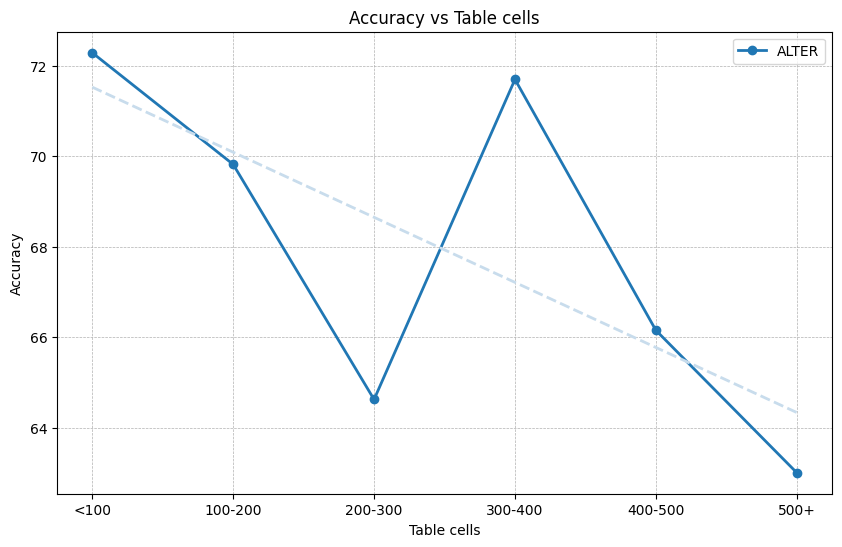

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 数据
categories = ["<100", "100-200", "200-300", "300-400", "400-500", "500+"]
accuracies = [72.29, 69.82, 64.62, 71.70, 66.15, 63]
# 将类别转换为数值型数据（1, 2, 3, ...）
categories_numeric = np.arange(1, len(categories) + 1)
# 计算回归线
slope, intercept, r_value, p_value, std_err = stats.linregress(categories_numeric, accuracies)
# 创建一个与categories相同长度的数组，用于绘制回归线
regression_line = slope * categories_numeric + intercept
# 绘制原始折线图
plt.figure(figsize=(10, 6))
plt.plot(categories, accuracies, marker='o', color='#2077B4', linestyle='-', linewidth=2, label='ALTER')
# 绘制回归线
plt.plot(categories, regression_line, color='#C8DCEC', linestyle='--', linewidth=2)
# 添加虚线网格
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# 添加标题和标签
plt.title("Accuracy vs Table cells")
plt.xlabel("Table cells")
plt.ylabel("Accuracy")
# 添加图例
plt.legend()
# 显示图表
plt.show()


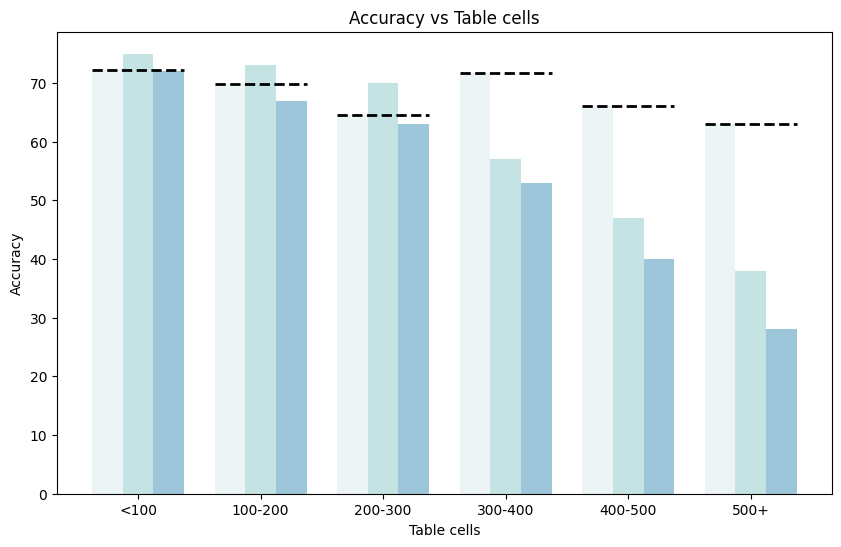

In [148]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ["<100", "100-200", "200-300", "300-400", "400-500", "500+"]
accuracies = [72.29, 69.82, 64.62, 71.70, 66.15, 63]
accuracies对比1 = [75, 73, 70, 57, 47, 38]
accuracies对比2 = [72, 67, 63, 53, 40, 28]

# 柱状图宽度
bar_width = 0.25
index = np.arange(len(categories))

# 创建柱状图
plt.figure(figsize=(10, 6))

# 绘制原始数据
plt.bar(index, accuracies, color='#EDF4F5', width=bar_width, label='ALTER')

# 绘制对比数据1
plt.bar(index + bar_width, accuracies对比1, color='#C5E3E2', width=bar_width, label='CABINET')

# 绘制对比数据2
plt.bar(index + 2 * bar_width, accuracies对比2, color='#9EC6DB', width=bar_width, label='OMNITAB')

# 设置横坐标标签
plt.xticks(index + bar_width, categories)

# 添加标题和标签
plt.title("Accuracy vs Table cells")
plt.xlabel("Table cells")
plt.ylabel("Accuracy")

for i in range(len(accuracies)):
    plt.hlines(accuracies[i], xmin=index[i]- 0.5 * bar_width, xmax=index[i] + 2.5 * bar_width,  color='black', linestyles='--', linewidth=2)
# plt.hlines(accuracies[2], xmin=0- bar_width, xmax=index[-1] + 2 * bar_width,  color='black', linestyles='--', linewidth=2)
# plt.hlines(accuracies[3], xmin=0- bar_width, xmax=index[-1] + 2 * bar_width,  color='black', linestyles='--', linewidth=2)
# plt.hlines(accuracies[4], xmin=0- bar_width, xmax=index[-1] + 2 * bar_width,  color='black', linestyles='--', linewidth=2)
# plt.hlines(accuracies[5], xmin=0- bar_width, xmax=index[-1] + 2 * bar_width,  color='black', linestyles='--', linewidth=2)
# plt.hlines(accuracies[1], index[1], index[1] + bar_width, color='black', linestyles='--', linewidth=2)
# plt.hlines(accuracies[2], index[2], index[2] + bar_width, color='black', linestyles='--', linewidth=2)
# plt.hlines(accuracies[3], index[3], index[3] + bar_width, color='black', linestyles='--', linewidth=2)
# plt.hlines(accuracies[4], index[4], index[4] + bar_width, color='black', linestyles='--', linewidth=2)
# plt.hlines(accuracies[5], index[5], index[5] + bar_width, color='black', linestyles='--', linewidth=2)

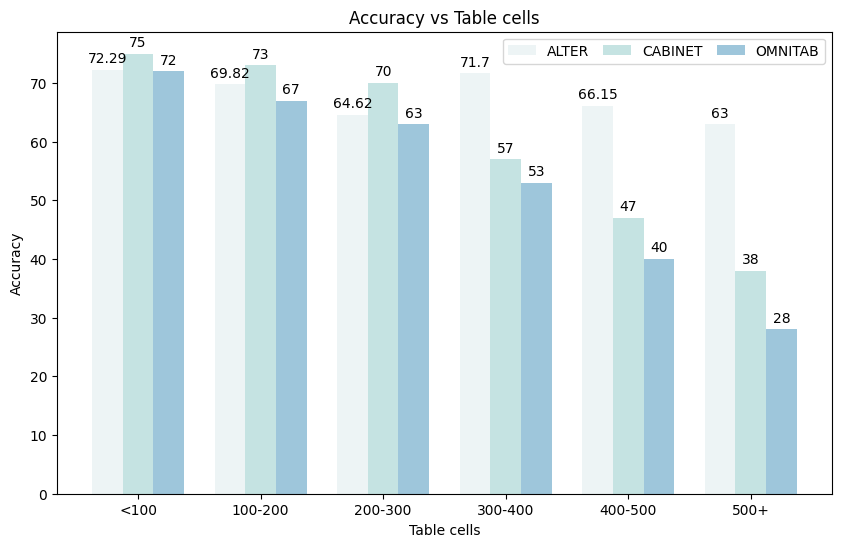

In [153]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ["<100", "100-200", "200-300", "300-400", "400-500", "500+"]
accuracies = [72.29, 69.82, 64.62, 71.70, 66.15, 63]
accuracies对比1 = [75, 73, 70, 57, 47, 38]
accuracies对比2 = [72, 67, 63, 53, 40, 28]

# 柱状图宽度
bar_width = 0.25
index = np.arange(len(categories))

# 创建柱状图
fig, ax = plt.subplots(figsize=(10, 6))

# 使用ax.bar的模式绘制原始数据
rects = ax.bar(index, accuracies, color='#EDF4F5', width=bar_width, label='ALTER')
ax.bar_label(rects, padding=3)
# 绘制对比数据1
rects = ax.bar(index + bar_width, accuracies对比1, color='#C5E3E2', width=bar_width, label='CABINET')
ax.bar_label(rects, padding=3)
# 绘制对比数据2
rects = ax.bar(index + 2 * bar_width, accuracies对比2, color='#9EC6DB', width=bar_width, label='OMNITAB')
ax.bar_label(rects, padding=3)
# 设置横坐标标签
ax.set_xticks(index + bar_width)
ax.set_xticklabels(categories)

# 添加标题和标签
ax.set_title("Accuracy vs Table cells")
ax.set_xlabel("Table cells")
ax.set_ylabel("Accuracy")
ax.legend(loc='upper right', ncols=3, columnspacing=1)

In [175]:
a = [72, 70, 65, 72, 66, 63]
b = [72, 72, 70, 65, 72, 66]
[t1-t2 for t1, t2 in zip(a, b)]

[0, -2, -5, 7, -6, -3]

In [174]:
a = [72.29, 69.82, 64.62, 71.70, 66.15, 63]
b = [72.29, 72.29, 69.82, 64.62, 71.70, 66.15]
[t1-t2 for t1, t2 in zip(a, b)]

[0.0,
 -2.470000000000013,
 -5.199999999999989,
 7.079999999999998,
 -5.549999999999997,
 -3.1500000000000057]

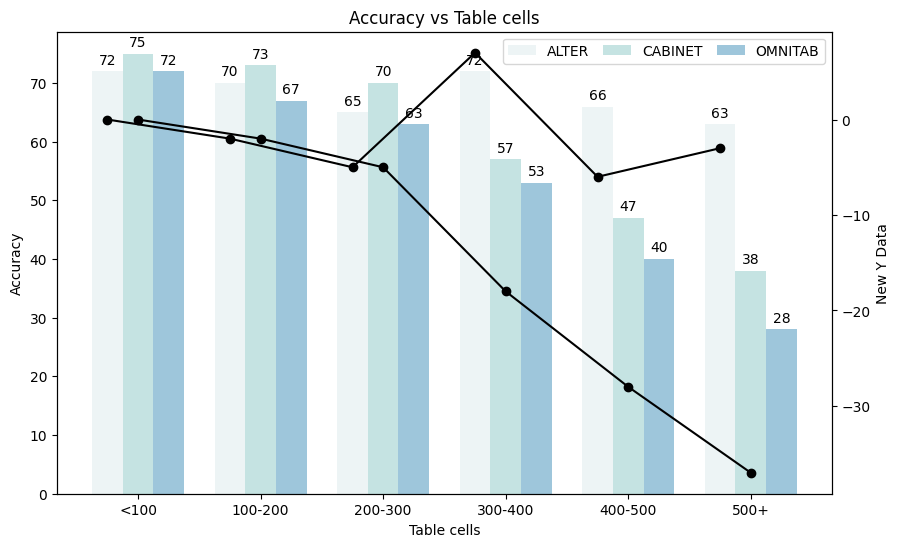

In [176]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ["<100", "100-200", "200-300", "300-400", "400-500", "500+"]
accuracies = [72, 70, 65, 72, 66, 63]
accuracies对比1 = [75, 73, 70, 57, 47, 38]
accuracies对比2 = [72, 67, 63, 53, 40, 28]
new_y_data_1 = [0, -2, -5, -18, -28, -37]
new_y_data = [0, -2, -5, 7, -6, -3]
# 柱状图宽度
bar_width = 0.25
index = np.arange(len(categories))

# 创建柱状图
fig, axs[0] = plt.subplots(figsize=(10, 6))

# 使用ax.bar的模式绘制原始数据
rects = axs[0].bar(index, accuracies, color='#EDF4F5', width=bar_width, label='ALTER')
axs[0].bar_label(rects, padding=3)
# 绘制对比数据1
rects = ax1.bar(index + bar_width, accuracies对比1, color='#C5E3E2', width=bar_width, label='CABINET')
ax1.bar_label(rects, padding=3)
# 绘制对比数据2
rects = ax1.bar(index + 2 * bar_width, accuracies对比2, color='#9EC6DB', width=bar_width, label='OMNITAB')
ax1.bar_label(rects, padding=3)

# 设置横坐标标签
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(categories)

# 添加标题和标签
ax1.set_title("Accuracy vs Table cells")
ax1.set_xlabel("Table cells")
ax1.set_ylabel("Accuracy")

# 新的y轴
ax2 = ax1.twinx()
ax2.plot(index , new_y_data, color='black', marker='o', label='New Data')
ax2.plot(index + 1 * bar_width, new_y_data_1, color='black', marker='o', label='New Data')
ax2.set_ylabel("New Y Data")

# 图例
ax1.legend(loc='upper right', ncols=3, columnspacing=1)
# ax2.legend(loc='upper right')

plt.show()


In [66]:
[ n + 0.25 for n in  np.arange(1, len(categories) + 1)]

[1.25, 2.25, 3.25, 4.25, 5.25, 6.25]

In [ ]:
[ n + bar_width for n in  categories_numeric]

In [117]:
slope * xinds

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [115]:
slope, intercept, r_value, p_value, std_err = stats.linregress(xinds, accuracies_ours)
slope

-1.4285714285714284

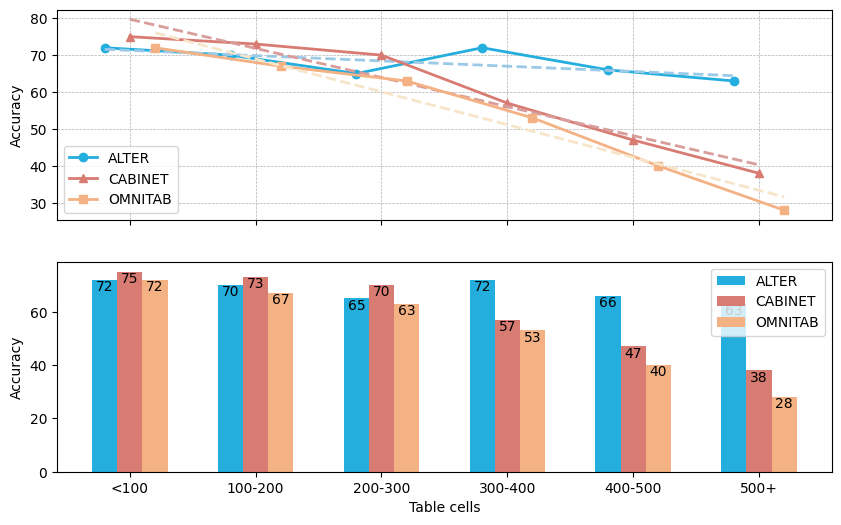

In [125]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

categories = ["<100", "100-200", "200-300", "300-400", "400-500", "500+"]
accuracies_1 = [75, 73, 70, 57, 47, 38]
accuracies_ours = [72, 70, 65, 72, 66, 63]
accuracies_2 = [72, 67, 63, 53, 40, 28]
# 将类别转换为数值型数据（1, 2, 3, ...）
categories_numeric = np.arange(1, len(categories) + 1)
bar_width = 0.2
# 计算回归线
xinds = np.array([n -1 for n in categories_numeric])
slope, intercept, r_value, p_value, std_err = stats.linregress(xinds, accuracies_ours)

# 创建一个与categories相同长度的数组，用于绘制回归线
regression_line = slope * xinds + intercept

# 绘制原始折线图
axs[0].plot(xinds, accuracies_ours, marker='o', color='#23AEDE', linestyle='-', linewidth=2, label='ALTER')

# 绘制回归线9BC9E8  C8DCEC
axs[0].plot(xinds, regression_line, color='#9BC9E8', linestyle='--', linewidth=2)

xinds = np.array([n + bar_width -1 for n in categories_numeric])

slope, intercept, r_value, p_value, std_err = stats.linregress(xinds, accuracies_1)
# 创建一个与categories相同长度的数组，用于绘制回归线
regression_line = slope * xinds + intercept
axs[0].plot(xinds, accuracies_1, marker='^', color='#D87B72', linestyle='-', linewidth=2, label='CABINET')
# 绘制回归线
axs[0].plot(xinds, regression_line, color='#D89E9B', linestyle='--', linewidth=2)

xinds = np.array([n + 2 * bar_width -1 for n in categories_numeric])
slope, intercept, r_value, p_value, std_err = stats.linregress(xinds, accuracies_2)
regression_line = slope * xinds + intercept
axs[0].plot(xinds, accuracies_2, marker='s', color='#F4B183', linestyle='-', linewidth=2, label='OMNITAB')
axs[0].plot(xinds, regression_line, color='#F7E5CA', linestyle='--', linewidth=2)
# 添加虚线网格
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# 添加标题和标签
# axs[0].set_title("Accuracy vs Table cells")
# axs[0].set_xlabel("Table cells")
axs[0].set_ylabel("Accuracy")

# 显示图例
axs[0].legend()



index = np.arange(len(categories))
rects = axs[1].bar(index, accuracies_ours, color='#23AEDE', width=bar_width, label='ALTER')
axs[1].bar_label(rects, padding=-10)

rects = axs[1].bar(index + bar_width, accuracies_1, color='#D87B72', width=bar_width, label='CABINET')
axs[1].bar_label(rects, padding=-10)
rects = axs[1].bar(index + 2 * bar_width, accuracies_2, color='#F4B183', width=bar_width, label='OMNITAB')
axs[1].bar_label(rects, padding=-10)
# 绘制对比数据1
# rects = axs[0].bar(index + bar_width, accuracies对比1, color='#C5E3E2', width=bar_width, label='CABINET')
# axs[0].bar_label(rects, padding=3)
# # 绘制对比数据2
# rects = axs[0].bar(index + 2 * bar_width, accuracies对比2, color='#9EC6DB', width=bar_width, label='OMNITAB')
# axs[0].bar_label(rects, padding=3)
# 设置横坐标标签
axs[1].set_xticks(index + bar_width)
axs[1].set_xticklabels(categories)

# 添加标题和标签
# axs[1].set_title("Accuracy vs Table cells")
axs[1].set_xlabel("Table cells")
axs[1].set_ylabel("Accuracy")
axs[1].legend()
plt.show()
# 数据



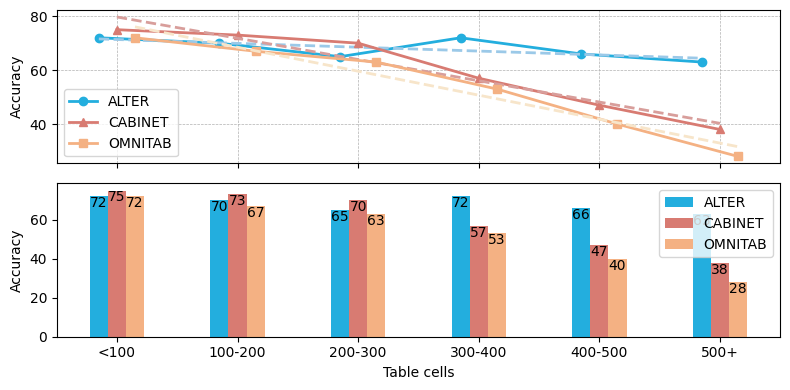

In [126]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 减小figsize，使得图形整体更小
fig, axs = plt.subplots(2, 1, figsize=(8, 4), sharex=True)

categories = ["<100", "100-200", "200-300", "300-400", "400-500", "500+"]
accuracies_1 = [75, 73, 70, 57, 47, 38]
accuracies_ours = [72, 70, 65, 72, 66, 63]
accuracies_2 = [72, 67, 63, 53, 40, 28]

# 减小bar_width，使得条形图更紧凑
bar_width = 0.15
categories_numeric = np.arange(1, len(categories) + 1)

# 绘制折线图和回归线
xinds = np.array([n - 1 for n in categories_numeric])
slope, intercept, r_value, p_value, std_err = stats.linregress(xinds, accuracies_ours)
regression_line = slope * xinds + intercept
axs[0].plot(xinds, accuracies_ours, marker='o', color='#23AEDE', linestyle='-', linewidth=2, label='ALTER')
axs[0].plot(xinds, regression_line, color='#9BC9E8', linestyle='--', linewidth=2)

xinds = np.array([n + bar_width - 1 for n in categories_numeric])
slope, intercept, r_value, p_value, std_err = stats.linregress(xinds, accuracies_1)
regression_line = slope * xinds + intercept
axs[0].plot(xinds, accuracies_1, marker='^', color='#D87B72', linestyle='-', linewidth=2, label='CABINET')
axs[0].plot(xinds, regression_line, color='#D89E9B', linestyle='--', linewidth=2)

xinds = np.array([n + 2 * bar_width - 1 for n in categories_numeric])
slope, intercept, r_value, p_value, std_err = stats.linregress(xinds, accuracies_2)
regression_line = slope * xinds + intercept
axs[0].plot(xinds, accuracies_2, marker='s', color='#F4B183', linestyle='-', linewidth=2, label='OMNITAB')
axs[0].plot(xinds, regression_line, color='#F7E5CA', linestyle='--', linewidth=2)

axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[0].set_ylabel("Accuracy")
axs[0].legend()

# 绘制条形图
index = np.arange(len(categories))
rects = axs[1].bar(index, accuracies_ours, color='#23AEDE', width=bar_width, label='ALTER')
axs[1].bar_label(rects, padding=-10)

rects = axs[1].bar(index + bar_width, accuracies_1, color='#D87B72', width=bar_width, label='CABINET')
axs[1].bar_label(rects, padding=-10)

rects = axs[1].bar(index + 2 * bar_width, accuracies_2, color='#F4B183', width=bar_width, label='OMNITAB')
axs[1].bar_label(rects, padding=-10)

axs[1].set_xticks(index + bar_width)
axs[1].set_xticklabels(categories)
axs[1].set_xlabel("Table cells")
axs[1].set_ylabel("Accuracy")
axs[1].legend()

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()


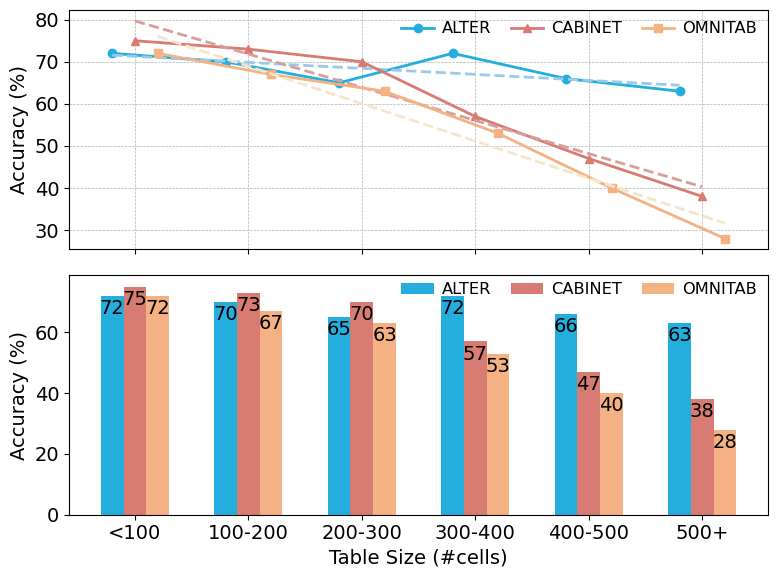

In [259]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 设置全局字体大小为small
plt.rcParams.update({'font.size': 14})

# 创建图形和轴
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

categories = ["<100", "100-200", "200-300", "300-400", "400-500", "500+"]
accuracies_1 = [75, 73, 70, 57, 47, 38]
accuracies_ours = [72, 70, 65, 72, 66, 63]
accuracies_2 = [72, 67, 63, 53, 40, 28]

bar_width = 0.2
categories_numeric = np.arange(1, len(categories) + 1)

# 绘制折线图和回归线
xinds = np.array([n - 1 for n in categories_numeric])
slope, intercept, r_value, p_value, std_err = stats.linregress(xinds, accuracies_ours)
regression_line = slope * xinds + intercept
axs[0].plot(xinds, accuracies_ours, marker='o', color='#23AEDE', linestyle='-', linewidth=2, label='ALTER')
axs[0].plot(xinds, regression_line, color='#9BC9E8', linestyle='--', linewidth=2)

xinds = np.array([n + bar_width - 1 for n in categories_numeric])
slope, intercept, r_value, p_value, std_err = stats.linregress(xinds, accuracies_1)
regression_line = slope * xinds + intercept
axs[0].plot(xinds, accuracies_1, marker='^', color='#D87B72', linestyle='-', linewidth=2, label='CABINET')
axs[0].plot(xinds, regression_line, color='#D89E9B', linestyle='--', linewidth=2)

xinds = np.array([n + 2 * bar_width - 1 for n in categories_numeric])
slope, intercept, r_value, p_value, std_err = stats.linregress(xinds, accuracies_2)
regression_line = slope * xinds + intercept
axs[0].plot(xinds, accuracies_2, marker='s', color='#F4B183', linestyle='-', linewidth=2, label='OMNITAB')
axs[0].plot(xinds, regression_line, color='#F7E5CA', linestyle='--', linewidth=2)

axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[0].set_ylabel("Accuracy (%)")

# 调整图例方框的大小
legend = axs[0].legend(frameon=False, fontsize='small', loc='upper right',framealpha=0.7, borderpad=0.2,  handletextpad=0.5,ncols=3,columnspacing=1.2)

# 绘制条形图
index = np.arange(len(categories))
rects = axs[1].bar(index, accuracies_ours, color='#23AEDE', width=bar_width, label='ALTER')
axs[1].bar_label(rects, padding=-16)

rects = axs[1].bar(index + bar_width, accuracies_1, color='#D87B72', width=bar_width, label='CABINET')
axs[1].bar_label(rects, padding=-16)

rects = axs[1].bar(index + 2 * bar_width, accuracies_2, color='#F4B183', width=bar_width, label='OMNITAB')
axs[1].bar_label(rects, padding=-16)

axs[1].set_xticks(index + bar_width)
axs[1].set_xticklabels(categories)
axs[1].set_xlabel("Table Size (#cells)")
axs[1].set_ylabel("Accuracy (%)")

# 调整第二个图例方框的大小
legend = axs[1].legend(frameon=False, fontsize='small', borderpad=0.2,loc='upper right', handletextpad=0.5, bbox_to_anchor=(0.5, 0.52, 0.5, 0.5), ncols=3,columnspacing=1.2)

plt.tight_layout()
# plt.show()
plt.savefig('./result/pic/large_table.pdf', bbox_inches='tight')


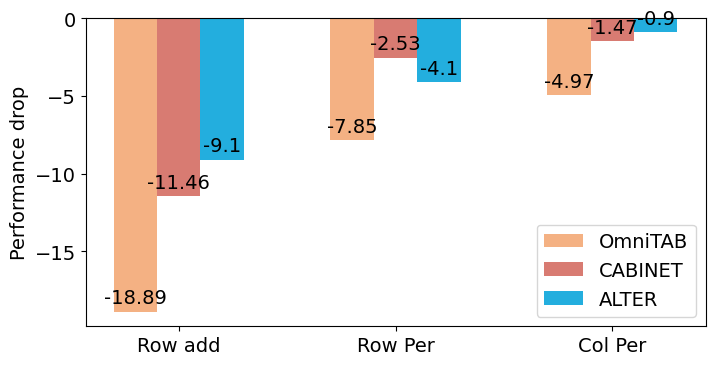

In [371]:
# 修改柱状图的颜色
colors = ['#F4B183', '#D87B72', '#23AEDE']
labels = ['Row add', 'Row Per', 'Col Per']
omniTAB = [-18.89, -7.85, -4.97]
cabinet = [-11.46, -2.53, -1.47]
alter = [-9.1, -4.1, -0.9]
width = 0.2  # 柱状图的宽度

# 计算柱状图的位置
x = np.arange(len(labels))
# 创建柱状图
fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.bar(x - width, omniTAB, width, color=colors[0], label='OmniTAB')
rects2 = ax.bar(x, cabinet, width, color=colors[1], label='CABINET')
rects3 = ax.bar(x + width, alter, width, color=colors[2], label='ALTER')

# 添加文本标签、标题和自定义x轴标签位置
ax.set_ylabel('Performance drop')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3点垂直偏移
                    textcoords="offset points",
                    ha='center', va='bottom')
# 在柱状图上添加数值标签
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# 显示图形
# plt.show()
plt.savefig('./result/pic/pertube.pdf', bbox_inches='tight')

In [50]:
ratio

[3.6538461538461537, 3.2981029810298104, 2.920863309352518, 2.7697547683923704]

In [ ]:
[3.65, 3.30, 2.92, 2.77]

In [49]:
ratio = [6080/1664, 6085 / 1845, 6090 / 2085, 6099 / 2202]

In [32]:
import pandas as pd
count_data = pd.read_csv('./result/wiki_count_0.csv')
sum(count_data['tokens']) / len(count_data)

1664.4814070351758

In [27]:
len(count_data)

4344

/tmp/ipykernel_1293452/552982098.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(x, y2, 'r-',marker='s', color='#D87B72',linewidth=2, label='ratio')


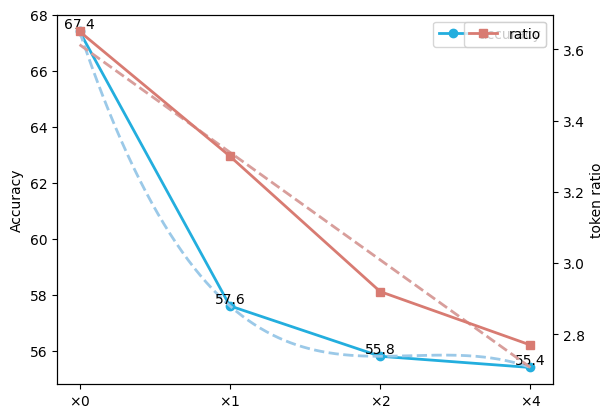

In [110]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
from scipy import stats
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = np.array([1, 2, 3, 4])
y = np.array([67.4, 57.6, 55.8, 55.4])
y2 = [3.65, 3.30, 2.92, 2.77]
label_x = [r'$\times 0$', r'$\times 1$', r'$\times 2$', r'$\times 4$']
for a,b in zip(x, y):
    ax.text(a,b,b, ha='center', va='bottom')
ax.plot(x, y, marker='o', color='#23AEDE',linewidth=2, label='accuracy')
ax.set_ylabel('Accuracy')
# model=make_interp_spline(x, y)
xnew = np.linspace(x.min(),x.max(),300)
# ynew = model(xnew)
func = interp1d(x,y,kind='cubic')
ynew = func(xnew)
# ax.errorbar(1, y[0], yerr=y[0]-y[1], color='gray')
ax.plot(xnew,ynew, linestyle='--',color='#9BC9E8', linewidth=2)  # 此时即为平滑曲线
ax.legend()
ax2 = ax.twinx()
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y2)
ax2.plot(x, slope * x + intercept, color='#D89E9B', linestyle='--',linewidth=2)
ax2.plot(x, y2, 'r-',marker='s', color='#D87B72',linewidth=2, label='ratio')
# ax2.scatter(x, y2, marker='s', color='r')
ax2.set_ylabel('token ratio')
ax2.tick_params('y')
ax2.set_xticks(x)
ax2.set_xticklabels(label_x)
ax2.legend()

In [ ]:
# for i, (a, b) in enumerate(zip(x, y_text)):
#     ax.text(a, b, f'{b:.1f}', ha='center', va='bottom', color=ax.lines[0].get_color())
# for i, (a, b) in enumerate(zip(x, y2)):
#     ax2.text(a, b, f'{b:.2f}', ha='center', va='bottom', color=ax2.lines[1].get_color())

In [128]:
[67.4 - a for a in[67.4, 57.6, 55.8, 55.4]]

[0.0, 9.800000000000004, 11.600000000000009, 12.000000000000007]

/tmp/ipykernel_1567483/405850071.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(x, y2, 'r-',  color='#23AEDE', linewidth=2, label='Token Ratio', marker='s', markersize=5)
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


[54. 56. 58. 60. 62. 64. 66. 68.]


findfont: Font family 'Times New Roman' not found.


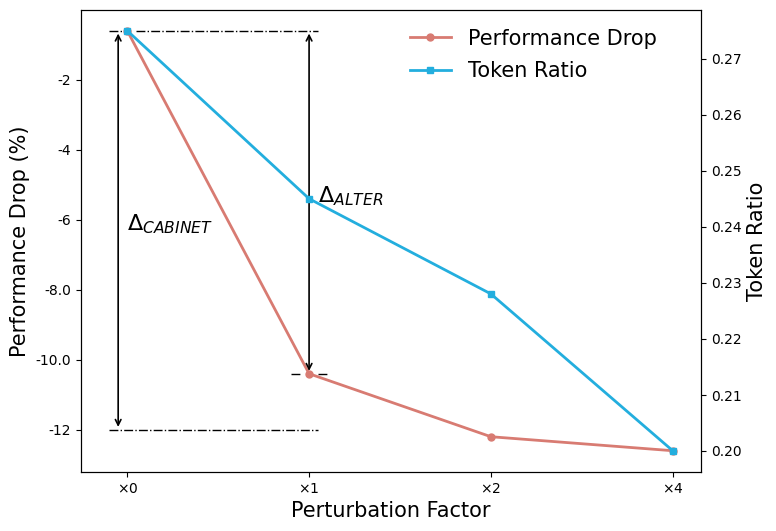

In [53]:
import numpy as np
from scipy.interpolate import interp1d
from scipy import stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

x = np.array([1, 2, 3, 4])
y = np.array([67.4, 57.6, 55.8, 55.4])
label_y = [0, -9.8, -11.6,-12]
y_abs = [0, 9.8, 11.6, 12.0]
# y2 = [3.65, 3.30, 2.92, 2.77]
# y2 = [0.16, 0.146, 0.138, 0.124]
y2 = [0.275, 0.245, 0.228, 0.2]
label_x = [r'$\times 0$', r'$\times 1$', r'$\times 2$', r'$\times 4$']

# 绘制第一个曲线及其值
ax.plot(x, y,  color='#D87B72', linewidth=2, label=r'Performance Drop', marker='o', markersize=5)
print(ax.get_yticks())
ax.set_yticks([54., 56., 58., 60., 62., 64. ,66.])
ax.set_yticklabels([-14, -12, -10. ,-8. ,-6 ,-4, -2])
ax.set_ylabel('Performance Drop (%)', fontdict={'size': 15})
ax.set_xlabel('Perturbation Factor', fontdict={'size': 15})
# 使用插值函数创建平滑曲线
func = interp1d(x, y, kind='cubic')
xnew = np.linspace(x.min(), x.max(), 300)
ynew = func(xnew)
# ax.plot(xnew, ynew, linestyle='--', color='#9BC9E8', linewidth=2)  # 平滑曲线

# 计算差距线的长度
gap_length = y[0] - y[1]

# 在x=1的位置上画一条竖直的差距线
# ax3 = ax.twinx()
# ax.errorbar(1, y[0], yerr=np.array([[9.8],[0]]), color='gray', elinewidth=1, capsize=4, capthick=1, )
# ax.annotate("123", xy=(1-0.1, 6), xytext=(1-0.1, 9),arrowprops=dict(arrowstyle="<->"))
# ax.errorbar(1, y[0], yerr=np.array([[11.46],[0]]), color='gray', elinewidth=1, capsize=4, capthick=1, )
# 添加差距线的长度文本
# ax.text(1, (y[0] + y[1]) / 2, f'{gap_length:.1f}', ha='center', va='center', color='gray')
ax.hlines(y=67.4, color='black', linestyle='dashdot', linewidth=1,xmin=0.9, xmax=1)
ax.hlines(y=67.4, color='black', linestyle='dashdot', linewidth=1,xmin=1.05, xmax=2.05)
ax.hlines(y=57.6, color='black', linestyle='dashdot', linewidth=1,xmin=1.9, xmax=1.95)
ax.hlines(y=57.6, color='black', linestyle='dashdot', linewidth=1,xmin=2.05, xmax=2.1)
ax.hlines(y=56, color='black', linestyle='dashdot', linewidth=1,xmin=0.9, xmax=2.05)
# ax.hlines(y=57.6, color='gray', linestyle='--', linewidth=1,xmin=1, xmax=2)
# ax.text(0.5, 56.5, 'CABINET performance drop 11.4')
# 绘制第二个曲线及其值
ax2 = ax.twinx()
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y2)
# ax2.plot(x, slope * x + intercept, color='#D89E9B', linestyle='--', linewidth=2)
ax2.plot(x, y2, 'r-',  color='#23AEDE', linewidth=2, label='Token Ratio', marker='s', markersize=5)
ax2.set_ylabel('Token Ratio', fontdict={'size': 15})
ax2.tick_params('y')

ax2.set_xticks(x)
ax2.set_xticklabels(label_x)
# ax2.set_yticks([0.125, 0.135, 0.145, 0.155])
# ax2.set_yticklabels([-14, -12, -10. ,-8. ,-6 ,-4, -2])
ax.annotate('', xy=(2, 57.6), xytext=(2, 67.4),arrowprops=dict(arrowstyle="<->", lw=1.2), horizontalalignment='center')
ax.text(1 ,61.7,r'$\Delta_{CABINET}$', fontdict={'size':16,'color':'black', 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
ax.annotate('', xy=(0.95, 56), xytext=(0.95, 67.4),arrowprops=dict(arrowstyle="<->", lw=1.2), horizontalalignment='center', verticalalignment='top')
ax.text(2.05, 62.5,r'$\Delta_{ALTER}$', fontdict={'size':16,'color':'black', 'fontweight': 'bold', 'fontfamily': 'Times New Roman'})
# ax.text(1, 62.5,'drop in ALTER', fontdict={'size':12,'color':'#F4B183'})
# 设置legend位置
ax.legend(loc='upper left', bbox_to_anchor=(0.5, 1), frameon=False,prop={'size': 15} )
ax2.legend(loc='upper left', bbox_to_anchor=(0.5, 0.93),frameon=False, prop={'size': 15})

# plt.show()
# plt.tight_layout()
# plt.show()
plt.savefig('./result/pic/perturbation.pdf', bbox_inches='tight')


In [ ]:
cell_count = pd.read_csv('./result/wiki_count_0_cell.csv')


0.27542135884510244

In [44]:
sum(3 / cell_count['row_count']) / len(cell_count)

0.21505209673131684

In [46]:
cell_count = pd.read_csv('./result/wiki_count_0_cell.csv')
# sum(cell_count['sample']) /sum(cell_count['tokens'])
sum(cell_count['sample'] / cell_count['tokens']) / len(cell_count)

0.27542135884510244